In [1]:
from autoscraper import AutoScraper
from flask import Flask, request
from sklearn.pipeline import Pipeline

# Description:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("Display.max_columns",None)
%matplotlib inline

In [3]:
credit_risk_m=pd.read_csv('data.csv')
credit_risk_m.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,01-01-1985,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2015,171.62,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,01-04-1999,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-2013,119.66,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0,01-11-2001,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-2014,649.91,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,01-02-1996,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2015,357.48,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,01-01-1996,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
credit_risk_m.shape

(855969, 73)

In [5]:
credit_risk_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

# Start with preprocessing

In [6]:
credit_risk_m.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

<AxesSubplot:xlabel='default_ind', ylabel='count'>

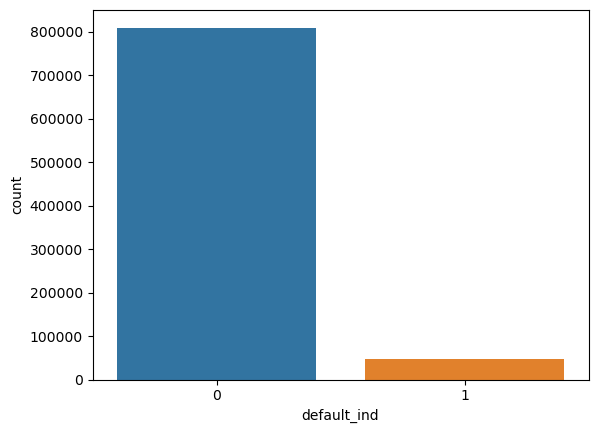

In [7]:
sns.countplot(credit_risk_m['default_ind'],data=credit_risk_m)

In [8]:
# we can see the dataset has more imbalance its more challenges to handdle.

In [9]:
# check discriptive statistics
credit_risk_m.describe(include=np.number)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,442.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.362036,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.235026,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.190000,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.750000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [10]:
# check discriptive statistics for caltegorical variable
credit_risk_m.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290910,11,6,3,103,2,120335,14,60954,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,01-10-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,01-08-2001,f,01-01-2016,01-02-2016,01-01-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


In [11]:
# we can check the frequncies of variable so most of variable have string and arithmatic signce so can clean it the data

In [12]:
# check missing values
null_values=(credit_risk_m.isnull().sum()/credit_risk_m.shape[0]*100).to_dict()

In [13]:
null_values

{'id': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'emp_title': 5.776260588876466,
 'emp_length': 5.030672839787422,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'pymnt_plan': 0.0,
 'desc': 85.76911079723682,
 'purpose': 0.0,
 'title': 0.003855279805693898,
 'zip_code': 0.0,
 'addr_state': 0.0,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'earliest_cr_line': 0.0,
 'inq_last_6mths': 0.0,
 'mths_since_last_delinq': 51.381767330358926,
 'mths_since_last_record': 84.67421133241974,
 'open_acc': 0.0,
 'pub_rec': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.05210469070725692,
 'total_acc': 0.0,
 'initial_list_status': 0.0,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'total_rec_prncp': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries': 0.0,
 'collection_recovery_fee'

In [14]:
list_more_null=[]
for key,value in null_values.items():
    if value >60:
        list_more_null.append(key)
    else:
        pass
        

In [15]:
list_more_null

['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [16]:
df=credit_risk_m.drop(['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m'],axis=1)

In [17]:
df.shape

(855969, 53)

In [18]:
# we can drop those variable they have more than 60% of null values are present 

In [19]:
null_value1=(df.isnull().sum()/df.shape[0]*100).to_dict()


In [20]:
list_null_value_cols=[]
for key,value in null_value1.items():
    if value > 0:
        list_null_value_cols.append(key)
    else:
        pass
print(list_null_value_cols)
        

['emp_title', 'emp_length', 'title', 'mths_since_last_delinq', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [21]:
for i in list_null_value_cols:
    if df[i].dtypes==np.number:
        df[i]=df[i].median()
    elif df[i].dtypes== object:
        df[i]=df[i].mode()[0]
    else:
        df[i]
        

In [22]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [23]:
# hence no null values are present in dataset

In [24]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,01-12-2011,n,credit_card,Debt consolidation,860xx,AZ,27.65,0,01-01-1985,1,31.0,3,0,13648,55.9,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2016,171.62,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Teacher,10+ years,RENT,30000.0,Source Verified,01-12-2011,n,car,Debt consolidation,309xx,GA,1.00,0,01-04-1999,5,31.0,3,0,1687,55.9,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-01-2016,119.66,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,01-12-2011,n,small_business,Debt consolidation,606xx,IL,8.72,0,01-11-2001,2,31.0,2,0,2956,55.9,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-01-2016,649.91,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,Teacher,10+ years,RENT,49200.0,Source Verified,01-12-2011,n,other,Debt consolidation,917xx,CA,20.00,0,01-02-1996,1,31.0,10,0,5598,55.9,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2016,357.48,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,Teacher,10+ years,RENT,80000.0,Source Verified,01-12-2011,n,other,Debt consolidation,972xx,OR,17.94,0,01-01-1996,0,31.0,15,0,27783,55.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0


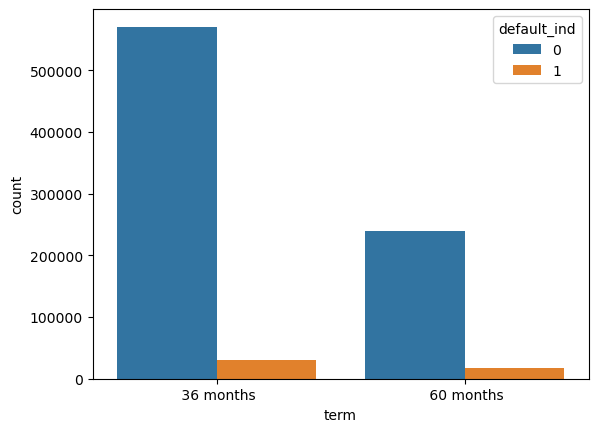

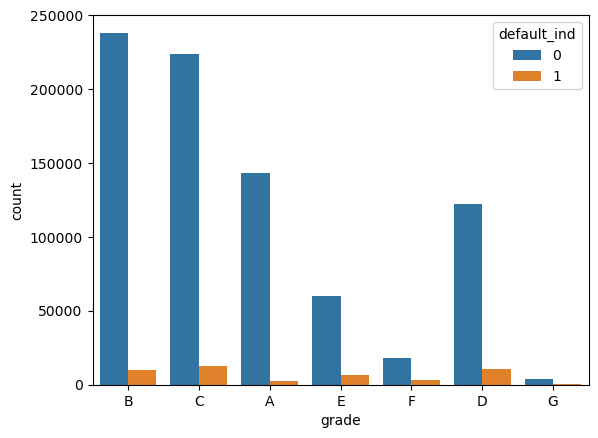

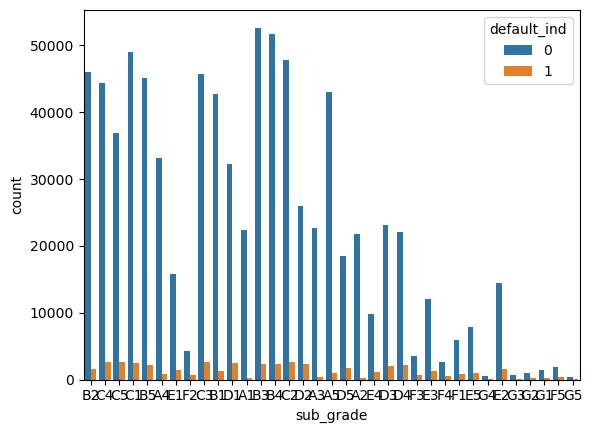

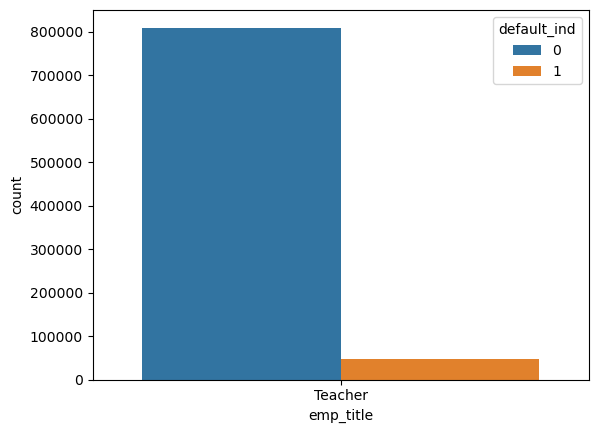

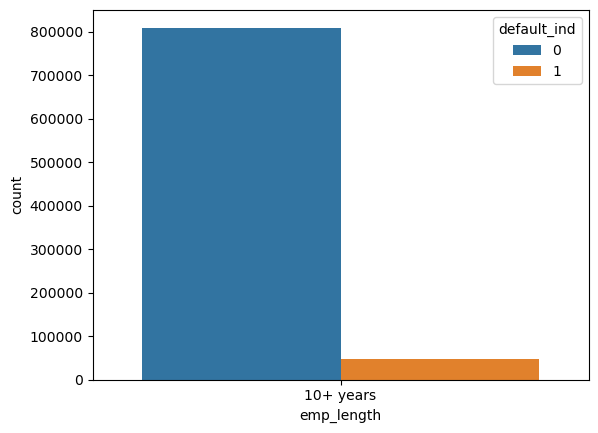

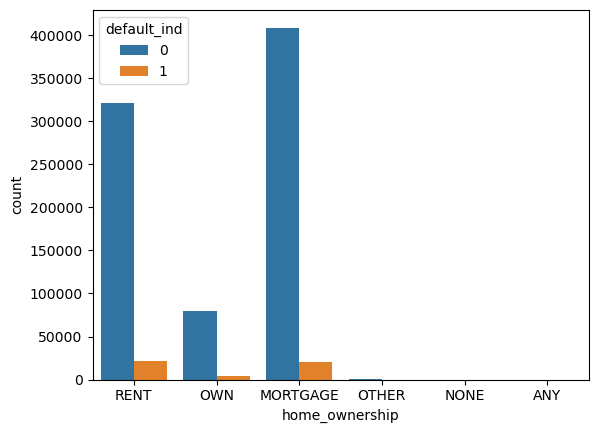

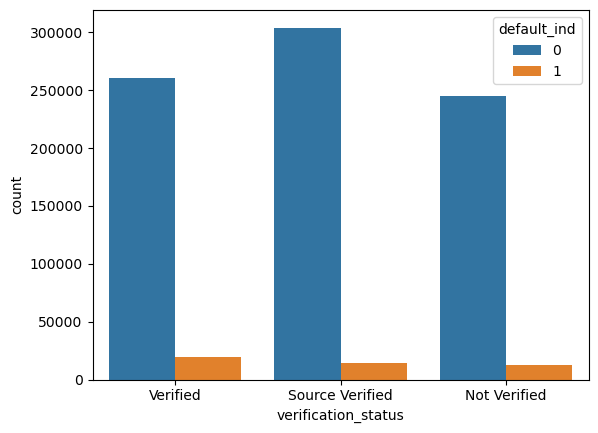

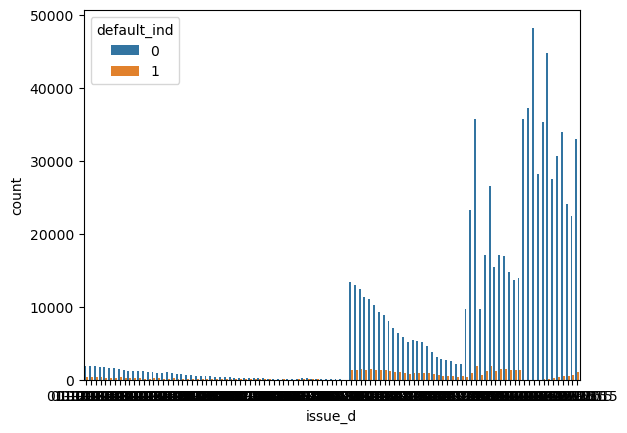

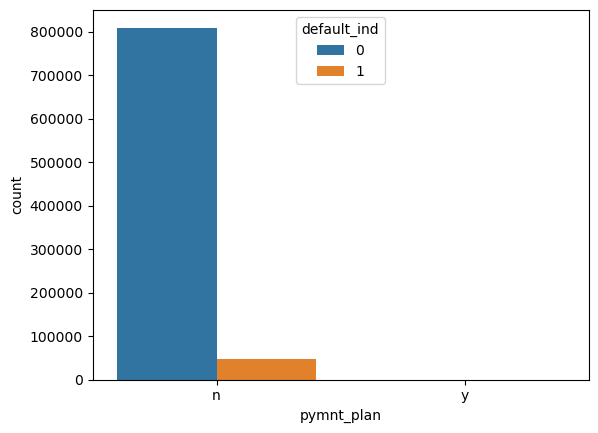

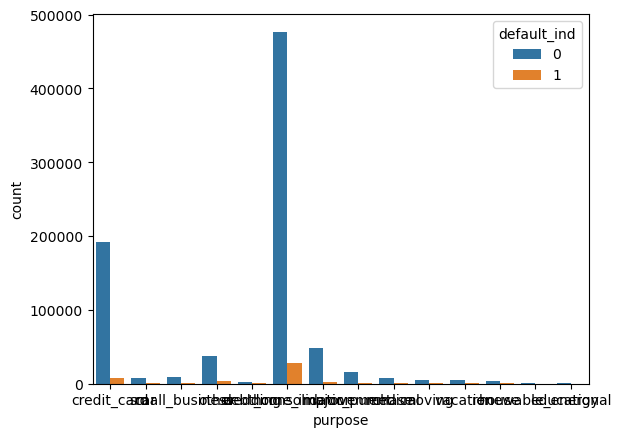

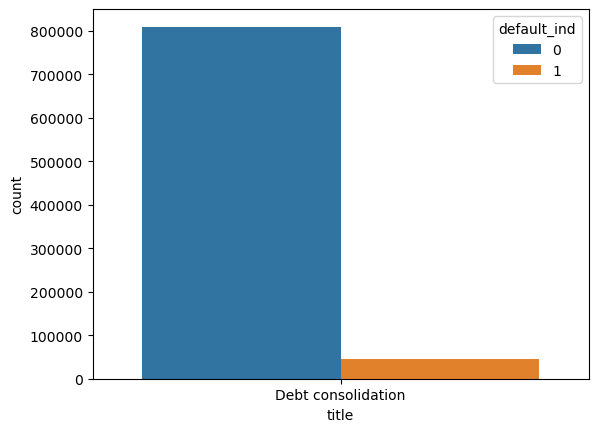

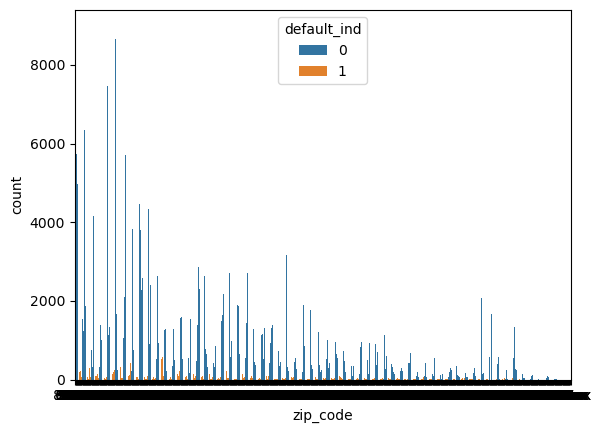

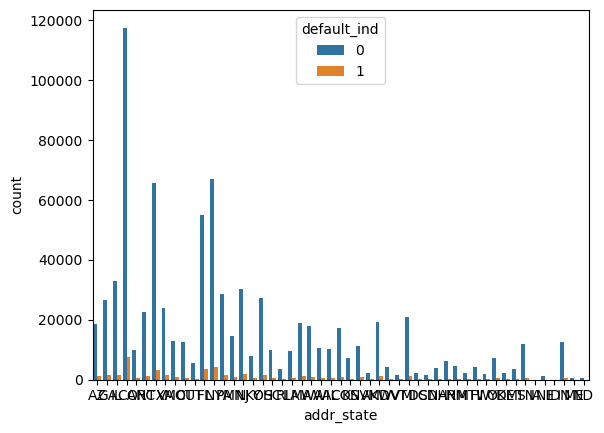

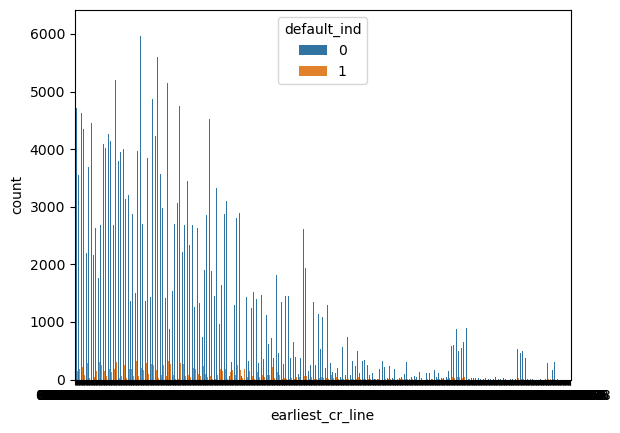

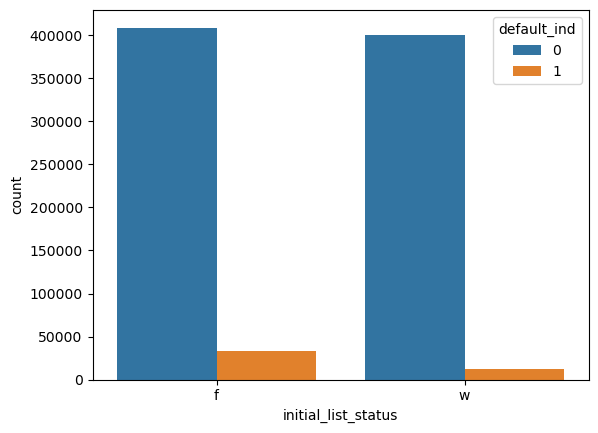

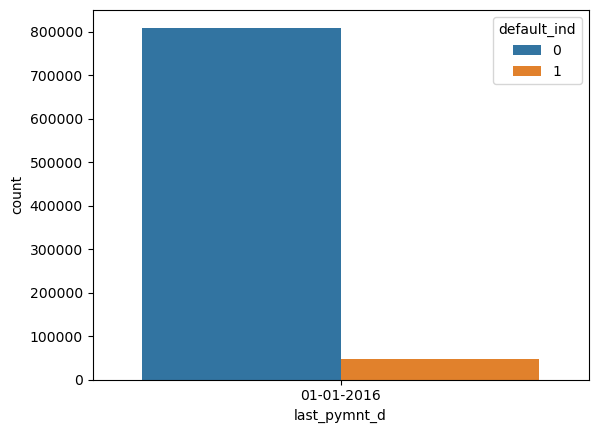

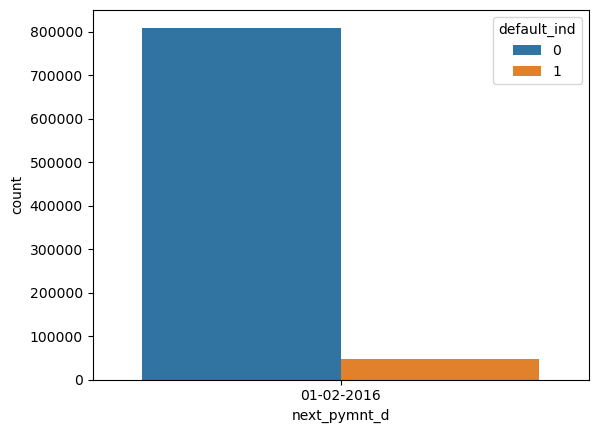

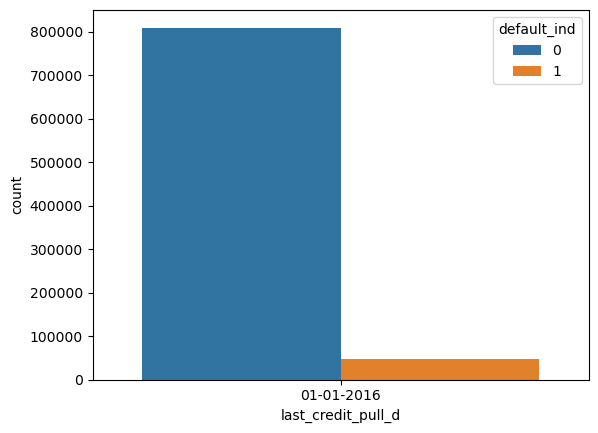

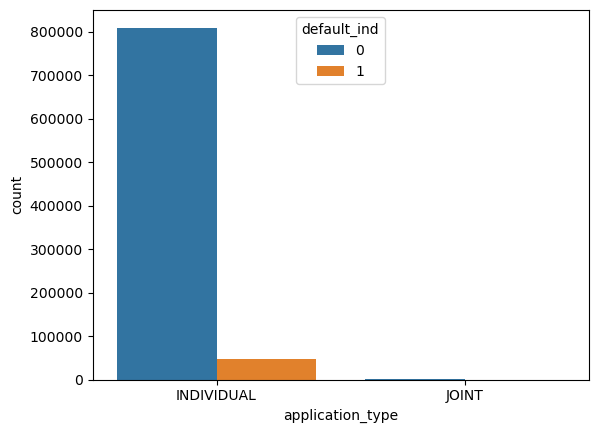

In [25]:
#we can check distrubution of data for categorical variable
for i in df.select_dtypes(include=object).columns:
    sns.countplot(df[i],hue='default_ind',data=df)
    plt.show()

In [26]:
# the data is very imbalance with respect to  target variable.

In [27]:
cat_var=df.select_dtypes(include=object).columns
cat_var

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [28]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [29]:
#create month column and stored values which lies between 30 month ,60 month
df['term_of_month']=df['term'].str.split(" ",expand=True)[1]

In [30]:
df.drop(columns='term',axis=1,inplace=True)

In [31]:
df.grade.value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [32]:
data_grade={'A':3,'B':1,'C':2,'D':4,'E':5,'F':6,'G':7}

In [33]:
df['grade']=df['grade'].map(data_grade)

In [34]:
df.sub_grade.value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

In [35]:
sub_g=df.sub_grade.value_counts(normalize=True).to_dict()
print(sub_g)

{'B3': 0.06420559623070461, 'B4': 0.06322191574694878, 'C1': 0.0602685377624657, 'C2': 0.0589472282290597, 'C3': 0.056470503020553314, 'B2': 0.05559663959792936, 'B5': 0.05529756334633614, 'C4': 0.054839602836084016, 'B1': 0.051406067275800875, 'A5': 0.051353495278450505, 'C5': 0.046183915538997325, 'D1': 0.04050029849211829, 'A4': 0.03971055026525493, 'D2': 0.033161247662006454, 'D3': 0.029544294244300905, 'D4': 0.028333970038634578, 'A3': 0.026981117306818354, 'A1': 0.026304690940910244, 'A2': 0.025825701631717973, 'D5': 0.023608331610140088, 'E1': 0.02012923365215329, 'E2': 0.01868525612492976, 'E3': 0.015530936283907478, 'E4': 0.012863783618331973, 'E5': 0.010419769874843597, 'F1': 0.00782972280538197, 'F2': 0.005816799440166642, 'F3': 0.004788724825314936, 'F4': 0.0037010686134661417, 'F5': 0.0027804745265307507, 'G1': 0.0019837167000206785, 'G2': 0.0014708476592026113, 'G3': 0.001024569815028348, 'G4': 0.0006659119664380368, 'G5': 0.0005479170390516479}


In [36]:
dict_a={key: round(value,3) for key,value in sub_g.items()}
print(dict_a)
    

{'B3': 0.064, 'B4': 0.063, 'C1': 0.06, 'C2': 0.059, 'C3': 0.056, 'B2': 0.056, 'B5': 0.055, 'C4': 0.055, 'B1': 0.051, 'A5': 0.051, 'C5': 0.046, 'D1': 0.041, 'A4': 0.04, 'D2': 0.033, 'D3': 0.03, 'D4': 0.028, 'A3': 0.027, 'A1': 0.026, 'A2': 0.026, 'D5': 0.024, 'E1': 0.02, 'E2': 0.019, 'E3': 0.016, 'E4': 0.013, 'E5': 0.01, 'F1': 0.008, 'F2': 0.006, 'F3': 0.005, 'F4': 0.004, 'F5': 0.003, 'G1': 0.002, 'G2': 0.001, 'G3': 0.001, 'G4': 0.001, 'G5': 0.001}


In [37]:
df['sub_grade']=df['sub_grade'].map(dict_a) 

In [38]:
df.emp_title.value_counts()

Teacher    855969
Name: emp_title, dtype: int64

In [39]:
data_f={'Teacher':1}

In [40]:
df['emp_title']=df['emp_title'].map(data_f)

In [41]:
df.emp_length.value_counts()

10+ years    855969
Name: emp_length, dtype: int64

In [42]:
df['emp_length']=df['emp_length'].str.split('+',expand=True)[0]

In [43]:
df['emp_length']=df['emp_length'].astype(int)

In [44]:
df['emp_length']=df['grade']+df['emp_length']#with add grade to consider the experiance of the emp is 10+ years

In [45]:
df['emp_length'].values

array([11, 12, 12, ..., 14, 15, 11], dtype=int64)

In [46]:
fghdata=df.home_ownership.value_counts().to_dict()
fghdata

{'MORTGAGE': 429106,
 'RENT': 342535,
 'OWN': 84136,
 'OTHER': 144,
 'NONE': 45,
 'ANY': 3}

In [47]:
data_m={'MORTGAGE': 1,
 'RENT': 2,
 'OWN': 3,
 'OTHER': 4,
 'NONE': 5,
 'ANY': 7}

In [48]:
df['home_ownership']=df['home_ownership'].map(data_m)

In [49]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_of_month
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,1,0.056,1,11,2,24000.0,Verified,01-12-2011,n,credit_card,Debt consolidation,860xx,AZ,27.65,0,01-01-1985,1,31.0,3,0,13648,55.9,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2016,171.62,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,2,0.055,1,12,2,30000.0,Source Verified,01-12-2011,n,car,Debt consolidation,309xx,GA,1.00,0,01-04-1999,5,31.0,3,0,1687,55.9,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-01-2016,119.66,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,1,60
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,2,0.046,1,12,2,12252.0,Not Verified,01-12-2011,n,small_business,Debt consolidation,606xx,IL,8.72,0,01-11-2001,2,31.0,2,0,2956,55.9,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-01-2016,649.91,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,2,0.060,1,12,2,49200.0,Source Verified,01-12-2011,n,other,Debt consolidation,917xx,CA,20.00,0,01-02-1996,1,31.0,10,0,5598,55.9,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2016,357.48,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,1,0.055,1,11,2,80000.0,Source Verified,01-12-2011,n,other,Debt consolidation,972xx,OR,17.94,0,01-01-1996,0,31.0,15,0,27783,55.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,60


In [50]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [51]:
df.loan_amnt.unique()

array([ 5000,  2500,  2400, ..., 32825, 32575, 34175], dtype=int64)

In [52]:
df.groupby('verification_status')['loan_amnt'].unique()

verification_status
Not Verified       [2400, 7000, 6500, 1000, 10000, 3600, 9200, 60...
Source Verified    [2500, 10000, 3000, 5000, 5600, 12000, 9000, 8...
Verified           [5000, 5375, 6000, 20250, 21000, 15000, 31825,...
Name: loan_amnt, dtype: object

In [53]:
data_n={'Not Verified':0,'Source Verified':1,'Verified':2}

In [54]:
df['verification_status']=df['verification_status'].map(data_n)

In [55]:
df['issue_d']=pd.to_datetime(df['issue_d'])

In [56]:
df['issue_date_day']=df['issue_d'].dt.day

In [57]:
df['issue_date_month']=df['issue_d'].dt.month

In [58]:
df['issue_date_year']=df['issue_d'].dt.year

In [59]:
df.drop(columns='issue_d',axis=1,inplace=True)

In [60]:
df.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [61]:
data_h={'n':0,'y':1}

In [62]:
df['pymnt_plan']=df['pymnt_plan'].map(data_h)

In [63]:
df.initial_list_status.unique()

array(['f', 'w'], dtype=object)

In [64]:
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [65]:
df['purpose'].value_counts().to_dict()

{'debt_consolidation': 505392,
 'credit_card': 200144,
 'home_improvement': 49956,
 'other': 40949,
 'major_purchase': 16587,
 'small_business': 9785,
 'car': 8593,
 'medical': 8193,
 'moving': 5160,
 'vacation': 4542,
 'house': 3513,
 'wedding': 2280,
 'renewable_energy': 549,
 'educational': 326}

In [66]:
data_j={'f':1,'w':0}

In [67]:
df['initial_list_status']=df['initial_list_status'].map(data_j)

In [68]:
data_k={'debt_consolidation': 1,
 'credit_card': 2,
 'home_improvement': 3,
 'other': 4,
 'major_purchase': 5,
 'small_business': 6,
 'car': 7,
 'medical': 8,
 'moving': 9,
 'vacation': 10,
 'house': 11,
 'wedding': 12,
 'renewable_energy': 13,
 'educational': 14}

In [69]:
df['purpose']=df['purpose'].map(data_k)

In [70]:
df['title']=df['title'].map({'Debt consolidation':1})

In [71]:
df.zip_code.value_counts()

945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
         ... 
503xx       1
889xx       1
524xx       1
888xx       1
507xx       1
Name: zip_code, Length: 931, dtype: int64

In [72]:
df['zip_code']=df['zip_code'].str.split('x',expand=True)[0]

In [73]:
df.addr_state.value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
dr=LabelEncoder()
df['addr_state']=dr.fit_transform(df['addr_state'])

In [76]:
df.drop(columns='earliest_cr_line',axis=1,inplace=True)

In [77]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_of_month,issue_date_day,issue_date_month,issue_date_year
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,1,0.056,1,11,2,24000.0,2,0,2,1,860,3,27.65,0,1,31.0,3,0,13648,55.9,9,1,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2016,171.62,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36,12,1,2011
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,2,0.055,1,12,2,30000.0,1,0,7,1,309,10,1.00,0,5,31.0,3,0,1687,55.9,4,1,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-01-2016,119.66,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,1,60,12,1,2011
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,2,0.046,1,12,2,12252.0,0,0,6,1,606,14,8.72,0,2,31.0,2,0,2956,55.9,10,1,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-01-2016,649.91,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36,12,1,2011
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,2,0.060,1,12,2,49200.0,1,0,4,1,917,4,20.00,0,1,31.0,10,0,5598,55.9,37,1,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2016,357.48,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36,12,1,2011
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,1,0.055,1,11,2,80000.0,1,0,4,1,972,37,17.94,0,0,31.0,15,0,27783,55.9,38,1,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,60,12,1,2011


In [78]:
cat_var

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [79]:
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d']=pd.to_datetime(df['next_pymnt_d'])

In [80]:
# calculate difference of next_pymnt_d of last_pymnt_d in days
df['last_pymnt_diff_next_pymnt_days']=df['next_pymnt_d'].dt.day - df['last_pymnt_d'].dt.day

In [81]:
var=df['next_pymnt_d'].dt.month - df['last_pymnt_d'].dt.month
var.unique()

array([0], dtype=int64)

In [82]:
df['last_pymnt_diff_next_pymnt_year']=df['next_pymnt_d'].dt.year 

In [83]:
# i can say that the difference between two variable is zero so we can put value of month or year is in same each day.

In [84]:
#so we can drop this columns
df.drop(columns=['last_pymnt_d','next_pymnt_d'],axis=1,inplace=True)

In [85]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,term_of_month,issue_date_day,issue_date_month,issue_date_year,last_pymnt_diff_next_pymnt_days,last_pymnt_diff_next_pymnt_year
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,1,0.056,1,11,2,24000.0,2,0,2,1,860,3,27.65,0,1,31.0,3,0,13648,55.9,9,1,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36,12,1,2011,1,2016
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,2,0.055,1,12,2,30000.0,1,0,7,1,309,10,1.00,0,5,31.0,3,0,1687,55.9,4,1,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,1,60,12,1,2011,1,2016
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,2,0.046,1,12,2,12252.0,0,0,6,1,606,14,8.72,0,2,31.0,2,0,2956,55.9,10,1,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36,12,1,2011,1,2016
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,2,0.060,1,12,2,49200.0,1,0,4,1,917,4,20.00,0,1,31.0,10,0,5598,55.9,37,1,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,36,12,1,2011,1,2016
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,1,0.055,1,11,2,80000.0,1,0,4,1,972,37,17.94,0,0,31.0,15,0,27783,55.9,38,1,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,81008.5,23800.0,0,60,12,1,2011,1,2016


In [86]:
df.last_credit_pull_d.value_counts()

01-01-2016    855969
Name: last_credit_pull_d, dtype: int64

In [87]:
# we can conclude that the last_credit_pull_d variable have same values of day,month and year.
# we can drop the variable

In [88]:
df.drop(columns='last_credit_pull_d',axis=1,inplace=True)

In [89]:
df.application_type.unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [90]:
var1=df[df['application_type']=='INDIVIDUAL']['member_id'].value_counts()
print(len(var1))

855527


In [91]:
var2=df[df['application_type']=='JOINT']['member_id'].value_counts()
print(len(var2))

442


In [92]:
df['application_type']=df['application_type'].map({'INDIVIDUAL':1,'JOINT':0})

In [93]:
df['term_of_month']=df['term_of_month'].astype(int)

In [94]:
df['zip_code']=df['zip_code'].astype(int)

In [95]:
df.drop(columns=['delinq_2yrs','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','term_of_month'],axis=1,inplace=True)

In [96]:
df.default_ind .value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [97]:
df.dtypes

id                                   int64
member_id                            int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
int_rate                           float64
installment                        float64
grade                                int64
sub_grade                          float64
emp_title                            int64
emp_length                           int64
home_ownership                       int64
annual_inc                         float64
verification_status                  int64
pymnt_plan                           int64
purpose                              int64
title                                int64
zip_code                             int32
addr_state                           int32
dti                                float64
inq_last_6mths                       int64
mths_since_last_delinq             float64
open_acc                             int64
revol_bal  

In [98]:
df.drop(columns='id',axis=1,inplace=True)

In [99]:
cols=list(df.columns)

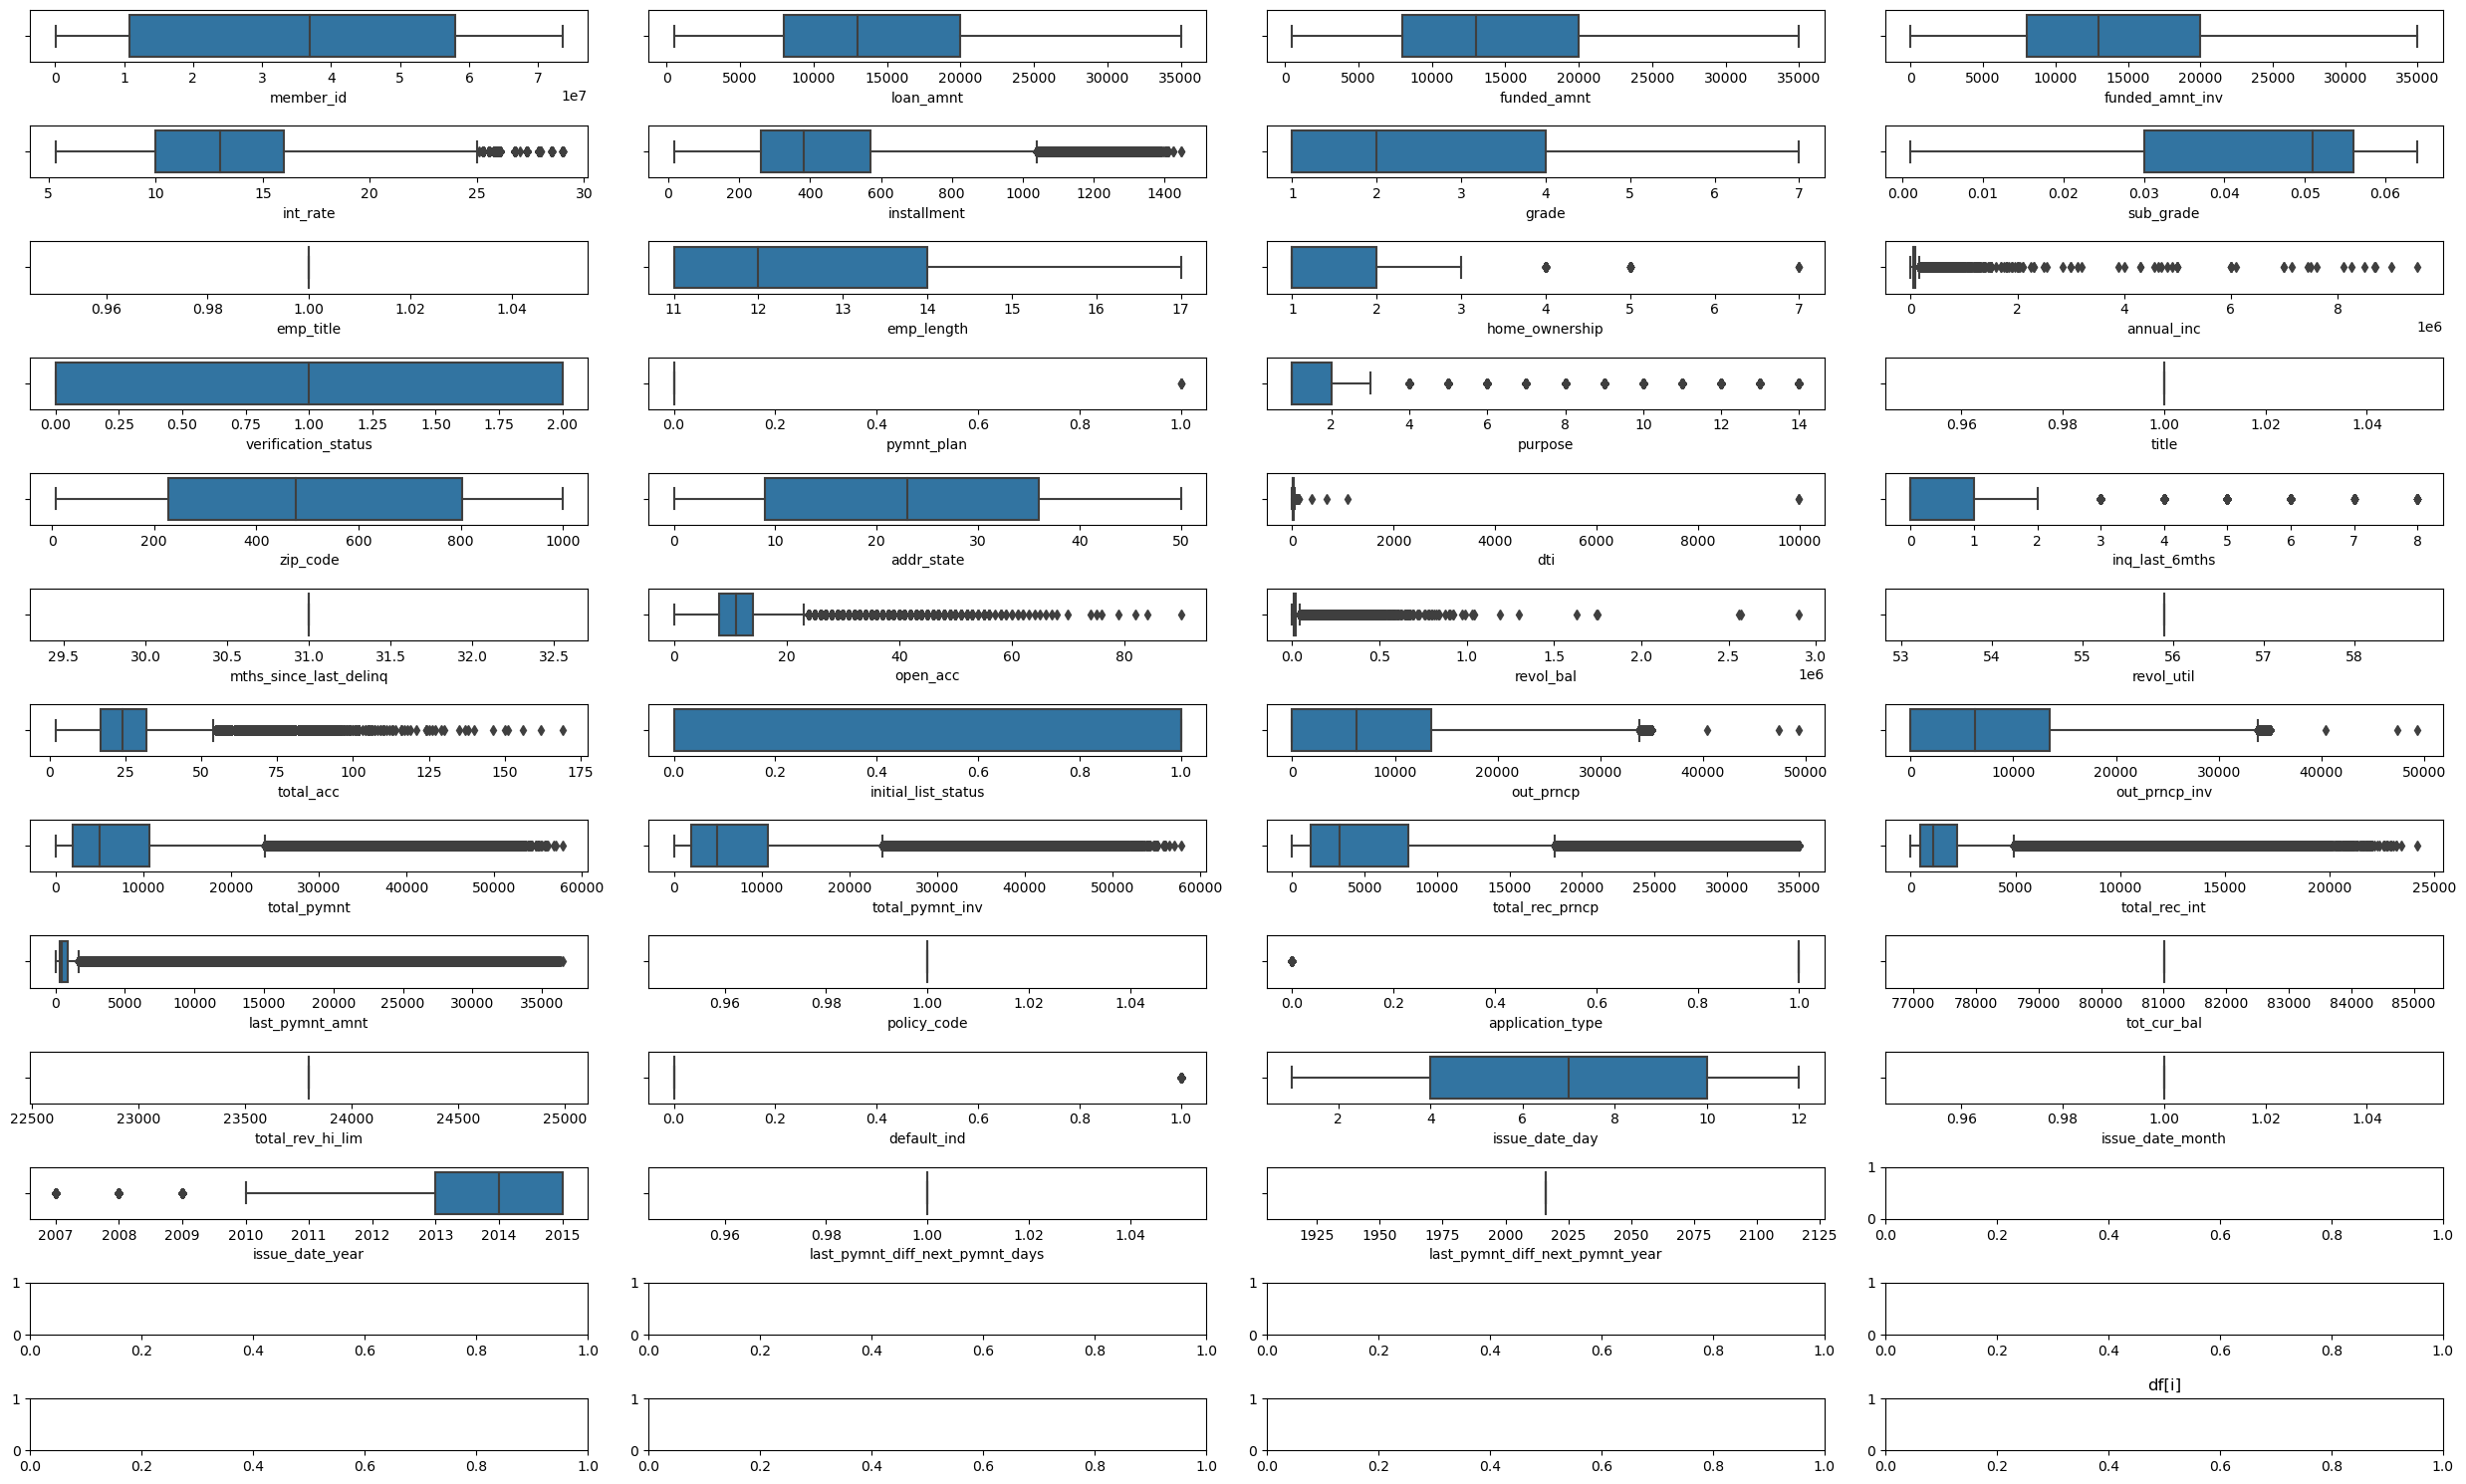

In [100]:
# we can check outliers are present or not in the perticular variable
fig,ax=plt.subplots(13,4,figsize=(25,15))
for i,j in zip(cols,ax.flatten()):
    sns.boxplot(df[i],ax=j)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

In [101]:
# we conclude that the most of variable have an outliers and few are normal so i create a copy of original dataframe and then remove ouliers using iqr method or capping method.

In [102]:
df3=df.copy()

In [103]:
for i in df.select_dtypes(include=np.number).columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
df = df[~((df[i] < ll) | (df[i] > ul))]

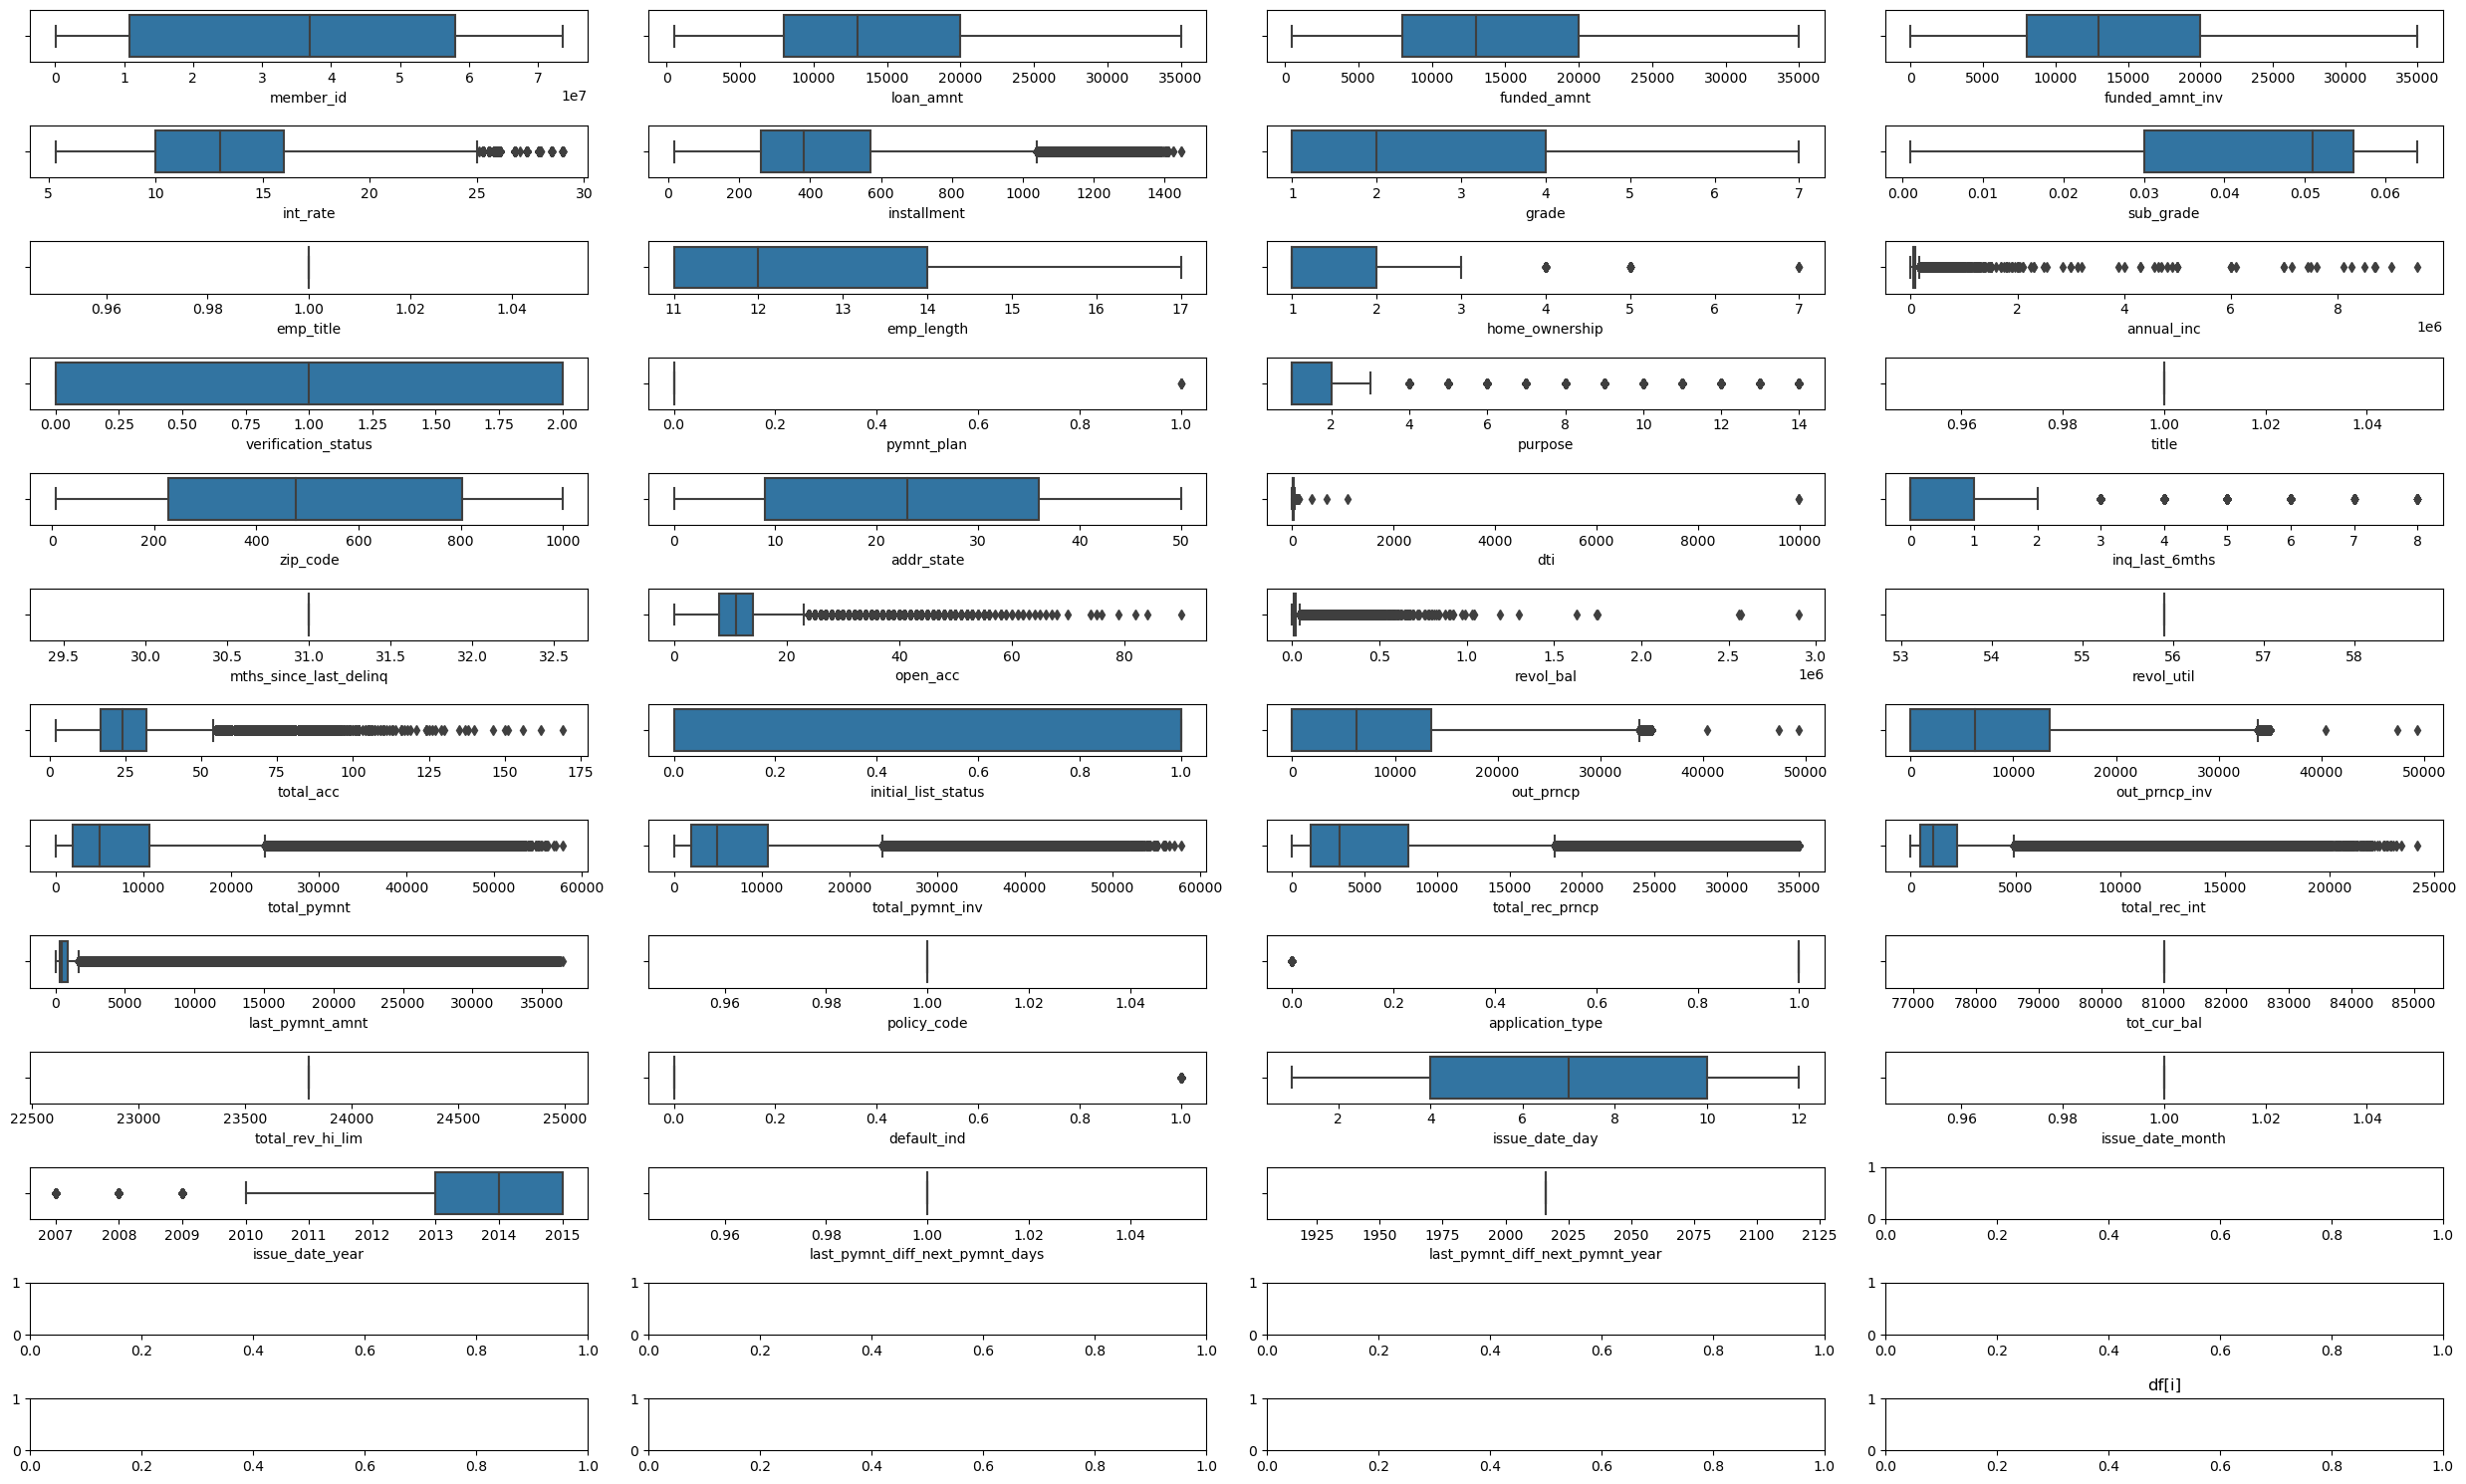

In [104]:
fig,ax=plt.subplots(13,4,figsize=(25,15))
for i,j in zip(cols,ax.flatten()):
    sns.boxplot(df[i],ax=j)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

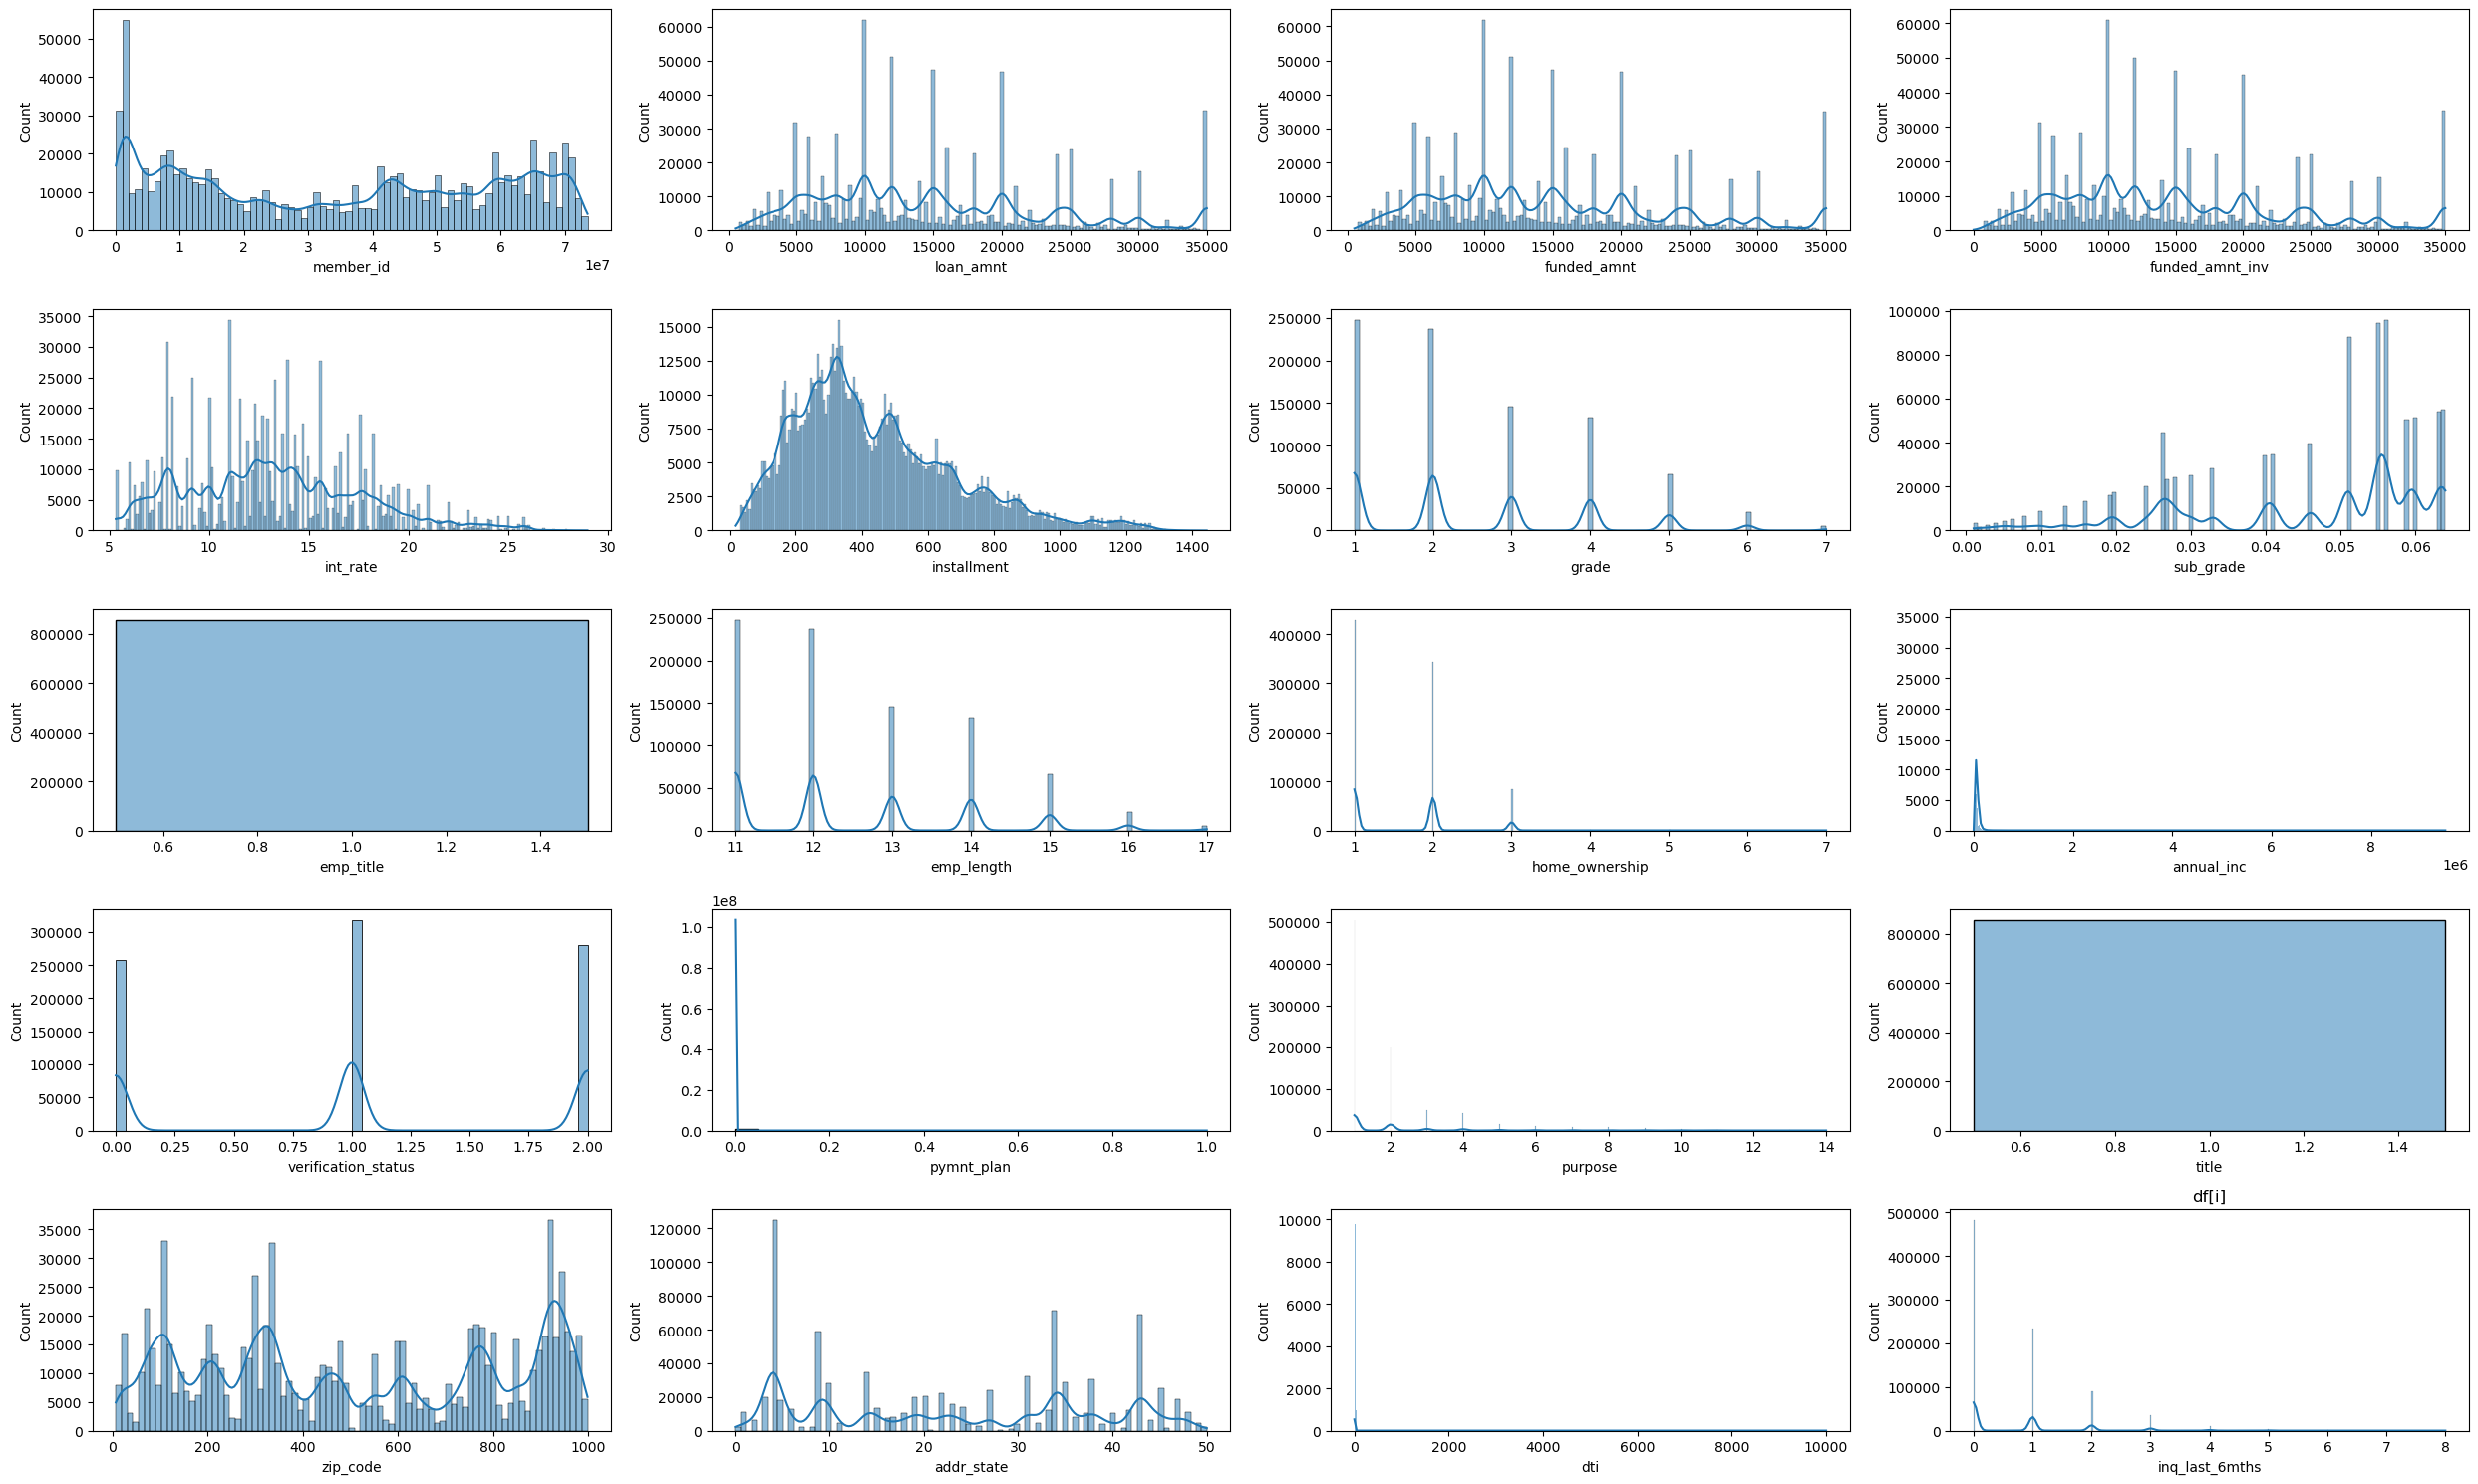

In [105]:
# check the distrubution of the variables 
fig,ax=plt.subplots(5,4,figsize=(25,15))
for i,j in zip(cols,ax.flatten()):
    sns.histplot(df[i],ax=j,kde=True)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

In [106]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code,application_type,tot_cur_bal,total_rev_hi_lim,default_ind,issue_date_day,issue_date_month,issue_date_year,last_pymnt_diff_next_pymnt_days,last_pymnt_diff_next_pymnt_year
0,1296599,5000,5000,4975.0,10.65,162.87,1,0.056,1,11,2,24000.0,2,0,2,1,860,3,27.65,1,31.0,3,13648,55.9,9,1,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62,1,1,81008.5,23800.0,0,12,1,2011,1,2016
1,1314167,2500,2500,2500.0,15.27,59.83,2,0.055,1,12,2,30000.0,1,0,7,1,309,10,1.00,5,31.0,3,1687,55.9,4,1,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66,1,1,81008.5,23800.0,1,12,1,2011,1,2016
2,1313524,2400,2400,2400.0,15.96,84.33,2,0.046,1,12,2,12252.0,0,0,6,1,606,14,8.72,2,31.0,2,2956,55.9,10,1,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91,1,1,81008.5,23800.0,0,12,1,2011,1,2016
3,1277178,10000,10000,10000.0,13.49,339.31,2,0.060,1,12,2,49200.0,1,0,4,1,917,4,20.00,1,31.0,10,5598,55.9,37,1,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48,1,1,81008.5,23800.0,0,12,1,2011,1,2016
4,1311748,3000,3000,3000.0,12.69,67.79,1,0.055,1,11,2,80000.0,1,0,4,1,972,37,17.94,0,31.0,15,27783,55.9,38,1,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79,1,1,81008.5,23800.0,0,12,1,2011,1,2016


In [107]:
#we can check relationship between target variable to independent variable by using visulization.

In [108]:
df2=df.drop(columns=['emp_title','title','mths_since_last_delinq','revol_util','policy_code','tot_cur_bal','total_rev_hi_lim','issue_date_month','last_pymnt_diff_next_pymnt_days','last_pymnt_diff_next_pymnt_year'],axis=1)

In [109]:
df2.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,application_type,default_ind,issue_date_day,issue_date_year
member_id,1.000000,0.063603,0.065862,0.070248,-0.142996,0.024311,0.001498,-0.000724,0.001498,0.022517,0.034338,-0.033452,-0.002174,-0.061306,-0.011689,0.012802,0.066620,-0.118790,0.089345,0.039704,0.031311,-0.372368,0.561980,0.561943,-0.592951,-0.589419,-0.552938,-0.456508,-0.228243,-0.033205,-0.220181,0.255976,0.832133
loan_amnt,0.063603,1.000000,0.999265,0.997601,0.142966,0.944870,0.151361,-0.136814,0.151361,-0.154490,0.335209,0.281637,0.000761,-0.166873,-0.004977,0.015798,0.020189,-0.028928,0.198926,0.337489,0.222084,-0.085440,0.639784,0.639786,0.479612,0.480328,0.395880,0.537586,0.233596,-0.011044,-0.004907,-0.003560,0.099625
funded_amnt,0.065862,0.999265,1.000000,0.998485,0.143116,0.945903,0.151017,-0.136467,0.151017,-0.154299,0.335002,0.281071,0.000766,-0.167613,-0.004942,0.015935,0.020583,-0.029279,0.199432,0.337405,0.222039,-0.087014,0.641706,0.641709,0.478290,0.479172,0.394669,0.536533,0.233134,-0.011087,-0.005797,-0.004059,0.104442
funded_amnt_inv,0.070248,0.997601,0.998485,1.000000,0.143374,0.944149,0.150516,-0.136102,0.150516,-0.154220,0.334356,0.281529,0.000752,-0.169385,-0.004827,0.016074,0.021489,-0.030462,0.200055,0.336870,0.222258,-0.090470,0.644011,0.644023,0.474600,0.478589,0.391010,0.534517,0.232029,-0.011114,-0.008209,-0.003203,0.117050
int_rate,-0.142996,0.142966,0.143116,0.143374,1.000000,0.130468,0.625749,-0.480508,0.625749,0.046825,-0.073825,0.250940,0.000844,0.045427,-0.000656,0.006099,0.078454,0.231705,-0.011091,-0.035344,-0.039482,0.114943,0.033933,0.033790,0.173387,0.174453,0.059298,0.446517,0.107346,-0.009837,0.155037,-0.035267,-0.064987
installment,0.024311,0.944870,0.945903,0.944149,0.130468,1.000000,0.143813,-0.134555,0.143813,-0.128182,0.328578,0.275346,0.001359,-0.153766,0.004905,0.008975,0.013909,0.001659,0.183817,0.320017,0.199872,-0.028699,0.539840,0.539835,0.520613,0.521332,0.455444,0.502038,0.243246,-0.009086,0.004753,-0.013215,0.070633
grade,0.001498,0.151361,0.151017,0.150516,0.625749,0.143813,1.000000,-0.898394,1.000000,0.014540,-0.006371,0.152164,0.000082,0.061018,-0.006103,0.004452,0.043008,0.142638,0.023331,-0.000908,0.002594,0.025312,0.103601,0.103473,0.082126,0.082098,0.003628,0.284775,0.060604,-0.008987,0.088624,-0.012000,0.013901
sub_grade,-0.000724,-0.136814,-0.136467,-0.136102,-0.480508,-0.134555,-0.898394,1.000000,-0.898394,-0.000242,-0.011993,-0.112334,0.000355,-0.061862,0.006431,-0.003702,-0.026020,-0.111112,-0.030555,-0.006700,-0.016818,-0.020705,-0.088401,-0.088285,-0.076006,-0.076071,-0.010613,-0.240605,-0.055091,0.006825,-0.072771,0.004147,-0.006375
emp_length,0.001498,0.151361,0.151017,0.150516,0.625749,0.143813,1.000000,-0.898394,1.000000,0.014540,-0.006371,0.152164,0.000082,0.061018,-0.006103,0.004452,0.043008,0.142638,0.023331,-0.000908,0.002594,0.025312,0.103601,0.103473,0.082126,0.082098,0.003628,0.284775,0.060604,-0.008987,0.088624,-0.012000,0.013901
home_ownership,0.022517,-0.154490,-0.154299,-0.154220,0.046825,-0.128182,0.014540,-0.000242,0.014540,1.000000,-0.132476,-0.022937,0.000739,0.043246,-0.001349,-0.035392,0.008969,-0.029223,-0.096820,-0.112250,-0.164779,0.018008,-0.081042,-0.081052,-0.099868,-0.100228,-0.089931,-0.090025,-0.059563,0.006916,0.019748,0.004702,0.005529


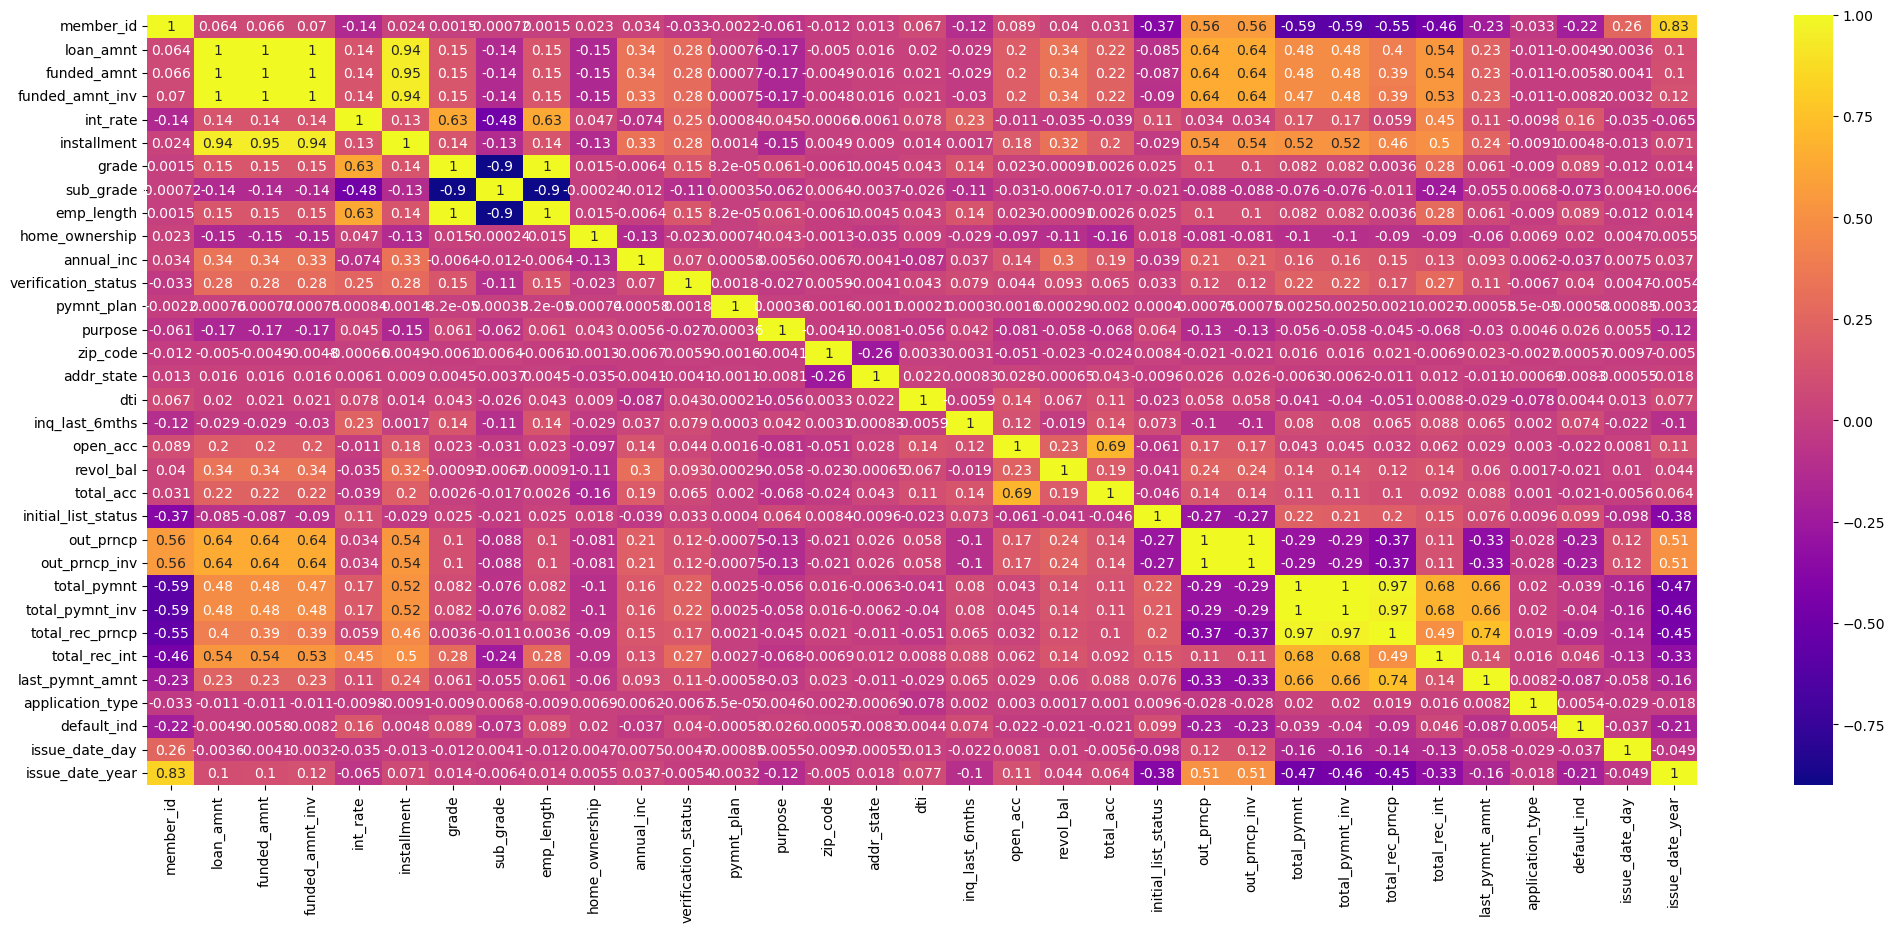

In [110]:
plt.figure(figsize=(25,10))
sns.heatmap(df2.corr(),annot=True,cmap='plasma')
plt.show()

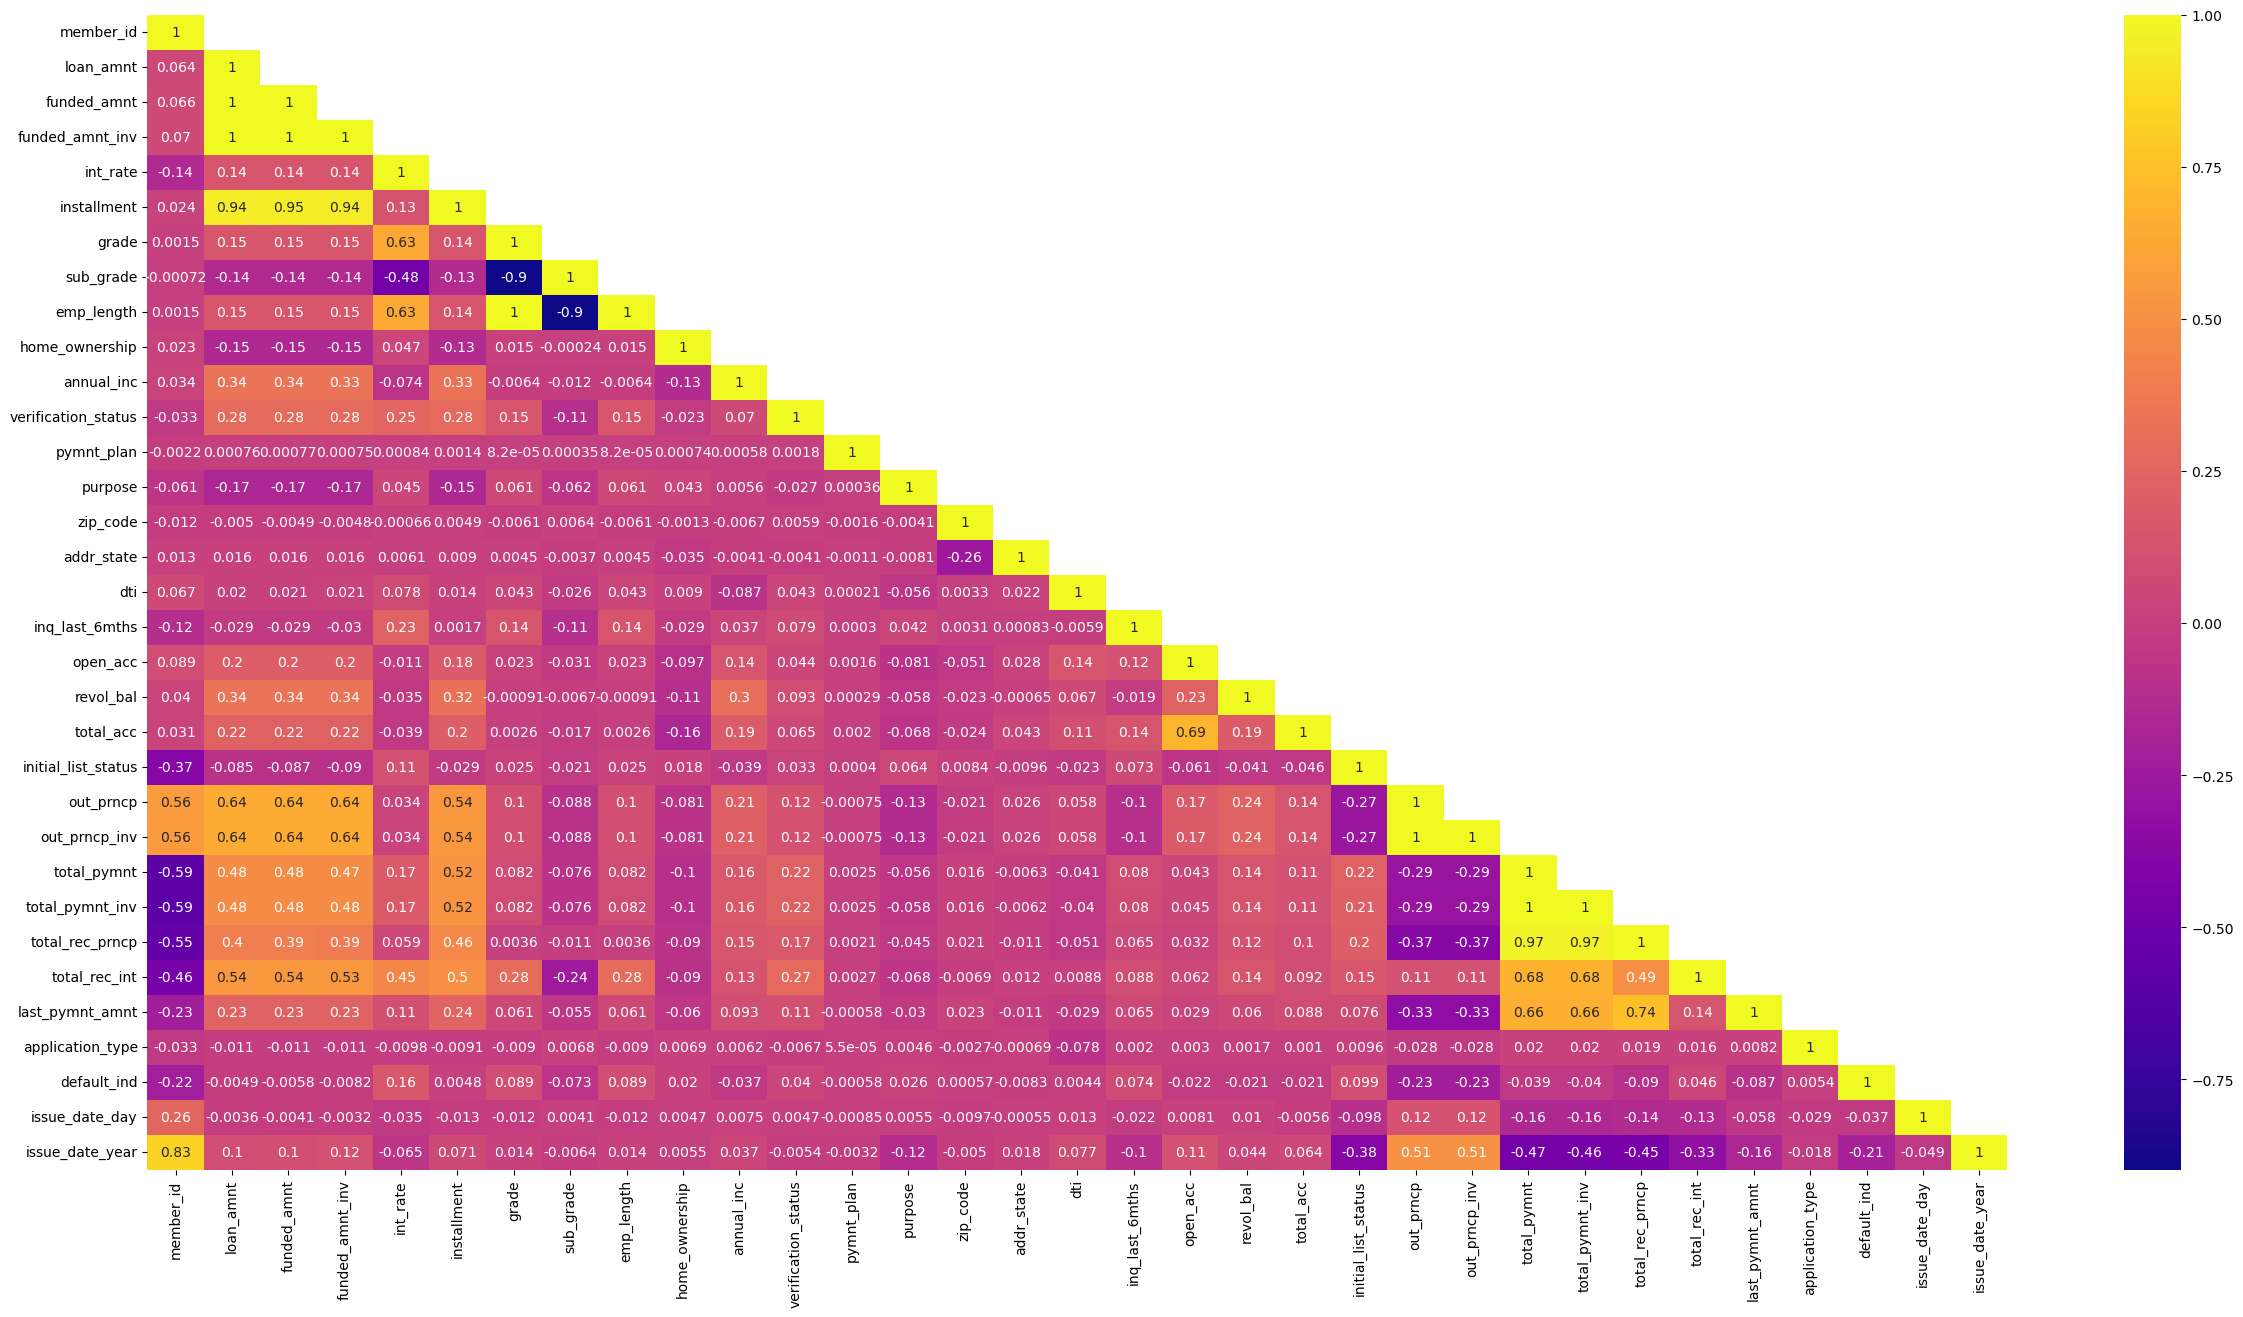

In [111]:
plt.figure(figsize=(30,15))
sns.heatmap(df2.corr(),annot=True,cmap='plasma',mask=np.triu(df2.corr(),+1))
plt.show()

In [112]:
#so we can conclude that the target variable is most of positive correlation between independent variable and also some of negative coorelation between indpendent variable.
#The issue_date_year independent variable highly correleted with dependent variable hence it have presence of multicolinerity.

In [113]:
x=df.drop(columns='default_ind',axis=1)
y=df['default_ind']

In [114]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [115]:
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(599178, 42) (256791, 42)
(599178,) (256791,)


In [116]:
# we can check the data using statistical test
from scipy.stats import stats

In [117]:
stat,p_value=stats.ttest_ind(xtrain,ytrain)
print(p_value)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 9.87439275e-222
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


In [118]:
# 

In [119]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [120]:
def model_evaluation(z,xtrain,xtest,ytrain,ytest):
    pred_T=z.predict(xtrain)
    print('Training report:',classification_report(ytrain,pred_T))
    print('*************************************************************')
    pred_t=z.predict(xtest)
    print('Testing report:',classification_report(ytest,pred_t))
    print('***************************************************************')

In [121]:
def confusion_mat(model,xtrain,xtest,ytrain,ytest):
    model_evaluation(model,xtrain,xtest,ytrain,ytest)
    pred_tx=model.predict(xtest)
    mat=confusion_matrix(ytest,pred_tx)
    sns.heatmap(mat,annot=True)
    print('confusion_matrixs:',mat)
    print('*******************************************************')

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
base1=lr.fit(xtrain,ytrain)

Training report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    566629
           1       0.96      0.83      0.89     32549

    accuracy                           0.99    599178
   macro avg       0.97      0.91      0.94    599178
weighted avg       0.99      0.99      0.99    599178

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    242873
           1       0.95      0.83      0.89     13918

    accuracy                           0.99    256791
   macro avg       0.97      0.92      0.94    256791
weighted avg       0.99      0.99      0.99    256791

***************************************************************
confusion_matrixs: [[242325    548]
 [  2319  11599]]
*******************************************************


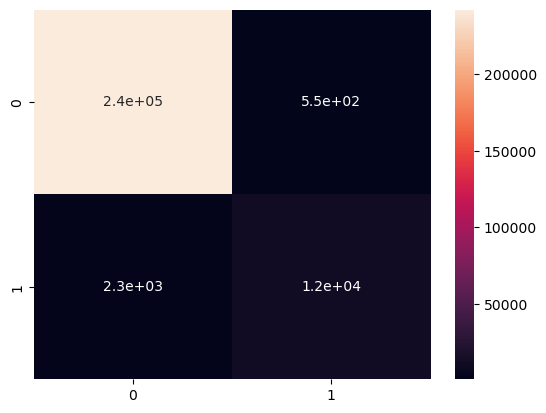

In [123]:
confusion_mat(base1,xtrain,xtest,ytrain,ytest)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
base2=kn.fit(xtrain,ytrain)

In [125]:
#model_evaluation(base2,xtrain,xtest,ytrain,ytest)

In [126]:
from sklearn.naive_bayes import  GaussianNB
gb=GaussianNB()
base3=gb.fit(xtrain,ytrain)

In [127]:
model_evaluation(base3,xtrain,xtest,ytrain,ytest)

Training report:               precision    recall  f1-score   support

           0       1.00      0.84      0.91    566629
           1       0.25      0.93      0.40     32549

    accuracy                           0.85    599178
   macro avg       0.63      0.89      0.66    599178
weighted avg       0.96      0.85      0.89    599178

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       1.00      0.84      0.91    242873
           1       0.25      0.93      0.40     13918

    accuracy                           0.85    256791
   macro avg       0.62      0.89      0.66    256791
weighted avg       0.95      0.85      0.89    256791

***************************************************************


In [128]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
base4=dt.fit(xtrain,ytrain)


In [129]:
model_evaluation(base4,xtrain,xtest,ytrain,ytest)

Training report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    566629
           1       1.00      1.00      1.00     32549

    accuracy                           1.00    599178
   macro avg       1.00      1.00      1.00    599178
weighted avg       1.00      1.00      1.00    599178

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    242873
           1       0.98      0.97      0.98     13918

    accuracy                           1.00    256791
   macro avg       0.99      0.99      0.99    256791
weighted avg       1.00      1.00      1.00    256791

***************************************************************


In [130]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
base5=rf.fit(xtrain,ytrain)

In [131]:
model_evaluation(base5,xtrain,xtest,ytrain,ytest)

Training report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    566629
           1       1.00      1.00      1.00     32549

    accuracy                           1.00    599178
   macro avg       1.00      1.00      1.00    599178
weighted avg       1.00      1.00      1.00    599178

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    242873
           1       1.00      0.95      0.98     13918

    accuracy                           1.00    256791
   macro avg       1.00      0.98      0.99    256791
weighted avg       1.00      1.00      1.00    256791

***************************************************************


In [132]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
bosting1=ad.fit(xtrain,ytrain)

In [133]:
model_evaluation(bosting1,xtrain,xtest,ytrain,ytest)

Training report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00    566629
           1       1.00      0.89      0.94     32549

    accuracy                           0.99    599178
   macro avg       1.00      0.95      0.97    599178
weighted avg       0.99      0.99      0.99    599178

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00    242873
           1       1.00      0.89      0.94     13918

    accuracy                           0.99    256791
   macro avg       1.00      0.95      0.97    256791
weighted avg       0.99      0.99      0.99    256791

***************************************************************


In [134]:
# i am conclude that the dataset has more imbalance so we can take sampling to solve this problem.

In [135]:
import imblearn
from collections import Counter

In [136]:
majority_class = df[df['default_ind'] == 0]
minority_class = df[df['default_ind'] == 1]

In [137]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
n_samples=len(minority_class)
undersample=resample(majority_class,replace=False, n_samples=200000, random_state=42)
balanced_data = pd.concat([undersample, minority_class])
balanced_data.shape

(246467, 43)

In [138]:
X=balanced_data.drop(columns='default_ind',axis=1)
y=balanced_data['default_ind']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(172526, 42) (73941, 42)
(172526,) (73941,)


In [140]:
rfa=RandomForestClassifier(n_estimators=50,max_depth=200)
bagb1=rfa.fit(x_train,y_train)

In [141]:
model_evaluation(bagb1,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    140121
           1       1.00      1.00      1.00     32405

    accuracy                           1.00    172526
   macro avg       1.00      1.00      1.00    172526
weighted avg       1.00      1.00      1.00    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00     59879
           1       1.00      0.97      0.98     14062

    accuracy                           0.99     73941
   macro avg       1.00      0.98      0.99     73941
weighted avg       0.99      0.99      0.99     73941

***************************************************************


In [142]:
#hyperparameter tuning to get best params
from sklearn.model_selection import GridSearchCV
tuning={'n_estimators':[2,4,8,10],
       'criterion':['gini','entropy'],
        'max_depth':[2,1,8,9],
        'min_samples_split':[1,3,4,8],
        'max_features':['sqrt','log2']
       }

In [143]:
rf=RandomForestClassifier()
rfbase=GridSearchCV(estimator=rf,param_grid=tuning,cv=5)
tune_model1=rfbase.fit(x_train,y_train)
tune_model1.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 10}

In [144]:
rfs=RandomForestClassifier(**tune_model1.best_params_)
tune_model2=rfs.fit(x_train,y_train)

In [145]:
model_evaluation(tune_model2,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    140121
           1       0.99      0.94      0.97     32405

    accuracy                           0.99    172526
   macro avg       0.99      0.97      0.98    172526
weighted avg       0.99      0.99      0.99    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99     59879
           1       0.99      0.94      0.96     14062

    accuracy                           0.99     73941
   macro avg       0.99      0.97      0.98     73941
weighted avg       0.99      0.99      0.99     73941

***************************************************************


In [146]:
addd=AdaBoostClassifier(n_estimators=150,learning_rate=0.01)
bost_model4=addd.fit(x_train,y_train)

In [147]:
model_evaluation(bost_model4,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96    140121
           1       0.78      0.96      0.86     32405

    accuracy                           0.94    172526
   macro avg       0.89      0.95      0.91    172526
weighted avg       0.95      0.94      0.95    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      0.94      0.96     59879
           1       0.79      0.96      0.87     14062

    accuracy                           0.94     73941
   macro avg       0.89      0.95      0.92     73941
weighted avg       0.95      0.94      0.95     73941

***************************************************************


In [176]:
import pickle
adabost_model_path='bost_model4.pickle'

In [177]:
with open('adabost_model_path', 'wb') as file:
    pickle.dump(adabost_model_path, file)

In [150]:
bost_model4.n_features_in_

42

In [151]:
# import joblib

# # Assuming you have a model object named 'model'
# joblib.dump(bost_model4,'bost_model4.joblib')

In [152]:
balanced_data.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code,application_type,tot_cur_bal,total_rev_hi_lim,default_ind,issue_date_day,issue_date_month,issue_date_year,last_pymnt_diff_next_pymnt_days,last_pymnt_diff_next_pymnt_year
8211,1074010,35000,23675,23625.0,10.99,514.64,1,0.064,1,11,1,90000.0,2,0,6,1,336,9,0.87,0,31.0,8,2411,55.9,22,1,0.00,0.00,26624.85000,26568.65,23675.01,2949.84,19433.24,1,1,81008.5,23800.0,0,9,1,2011,1,2016
634707,59761014,17800,17800,17800.0,22.99,501.69,6,0.006,1,16,2,35600.0,1,0,1,1,163,38,37.15,1,31.0,14,23502,55.9,27,0,16965.26,16965.26,2462.98000,2462.98,834.74,1628.24,501.69,1,1,81008.5,23800.0,0,7,1,2015,1,2016
625202,61049077,11500,11500,11500.0,16.55,407.44,4,0.033,1,14,2,32000.0,2,0,1,1,253,49,27.31,1,31.0,13,13704,55.9,19,1,10221.03,10221.03,2016.05000,2016.05,1278.97,737.08,407.44,1,1,81008.5,23800.0,0,8,1,2015,1,2016
131813,6518358,25375,25375,25375.0,17.77,641.19,4,0.041,1,14,1,56750.0,2,0,1,1,171,38,24.93,0,31.0,14,17846,55.9,27,1,0.00,0.00,33277.41908,33277.42,25375.00,7902.42,18530.23,1,1,81008.5,23800.0,0,5,1,2013,1,2016
832103,42463951,6000,6000,6000.0,7.49,186.61,3,0.040,1,13,2,37500.0,0,0,1,1,372,42,28.00,0,31.0,27,10462,55.9,37,0,0.00,0.00,6173.14000,6173.14,6000.00,173.14,2.25,1,1,81008.5,23800.0,0,1,1,2015,1,2016


In [153]:
balanced_data[balanced_data['issue_date_year']>1].sort_values(by='issue_date_year',ascending=True)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code,application_type,tot_cur_bal,total_rev_hi_lim,default_ind,issue_date_day,issue_date_month,issue_date_year,last_pymnt_diff_next_pymnt_days,last_pymnt_diff_next_pymnt_year
39690,90607,8500,8500,875.0,10.28,275.38,2,0.060,1,12,2,18000.0,0,0,2,1,274,27,6.40,1,31.0,6,8847,55.9,9,1,0.00,0.00,9912.49,1019.75,8500.00,1412.49,281.94,1,1,81008.5,23800.0,0,7,1,2007,1,2016
39609,130904,3775,3775,925.0,7.43,117.31,3,0.026,1,13,1,120000.0,0,0,4,1,641,24,0.00,1,31.0,10,0,55.9,22,1,0.00,0.00,4191.14,1026.70,3775.00,416.14,9.70,1,1,81008.5,23800.0,0,10,1,2007,1,2016
39461,182839,25000,25000,600.0,9.64,802.47,1,0.063,1,11,2,48000.0,0,0,1,1,474,15,9.78,4,31.0,22,8283,55.9,39,1,0.00,0.00,26630.16,639.11,25000.00,1630.16,20210.86,1,1,81008.5,23800.0,0,12,1,2007,1,2016
39691,90390,5000,5000,1325.0,8.07,156.84,3,0.040,1,13,1,100000.0,0,0,1,1,17,19,2.30,0,31.0,11,9698,55.9,20,1,0.00,0.00,5272.08,1397.09,5000.00,272.08,0.00,1,1,81008.5,23800.0,0,7,1,2007,1,2016
39642,118760,4000,4000,3575.0,7.43,124.31,3,0.026,1,13,2,40000.0,0,0,14,1,80,31,3.45,0,31.0,2,330,55.9,4,1,0.00,0.00,4474.19,3998.81,4000.00,474.19,119.24,1,1,81008.5,23800.0,0,8,1,2007,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761542,48521976,16000,16000,16000.0,5.93,486.25,3,0.026,1,13,1,86000.0,2,0,2,1,760,43,21.48,0,31.0,12,23755,55.9,22,0,12262.07,12262.07,4365.71,4365.71,3737.93,627.78,486.25,1,1,81008.5,23800.0,0,4,1,2015,1,2016
593681,63505841,28000,28000,28000.0,11.53,616.22,1,0.055,1,11,1,240000.0,1,0,5,1,486,22,9.27,0,31.0,18,17967,55.9,40,0,26948.40,26948.40,1830.72,1830.72,1051.60,779.12,616.22,1,1,81008.5,23800.0,0,9,1,2015,1,2016
548342,65599104,10000,10000,10000.0,11.53,329.91,1,0.055,1,11,1,140000.0,1,0,5,1,740,36,31.97,0,31.0,14,25312,55.9,29,1,9291.76,9291.76,976.92,976.92,708.24,268.68,329.91,1,1,81008.5,23800.0,0,10,1,2015,1,2016
458856,72181329,33575,33575,33575.0,18.99,870.77,5,0.016,1,15,1,76308.0,2,0,1,1,233,45,20.77,1,31.0,9,27573,55.9,28,0,33575.00,33575.00,0.00,0.00,0.00,0.00,0.00,1,1,81008.5,23800.0,0,12,1,2015,1,2016


In [154]:
len(balanced_data.columns)

43

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
gba=GradientBoostingClassifier(n_estimators=250,learning_rate=0.4)
bosting_2=gba.fit(x_train,y_train)

In [157]:
model_evaluation(bosting_2,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00    140121
           1       1.00      0.98      0.99     32405

    accuracy                           1.00    172526
   macro avg       1.00      0.99      0.99    172526
weighted avg       1.00      1.00      1.00    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00     59879
           1       1.00      0.97      0.98     14062

    accuracy                           0.99     73941
   macro avg       0.99      0.98      0.99     73941
weighted avg       0.99      0.99      0.99     73941

***************************************************************


In [158]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics
def roc_curve_a(model, x_test, y_test):
    pred_x = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_x)
    
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], 'r--')  # ROC diagonal line
    plt.title('AUC & ROC curve of GDB')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    auc = round(roc_auc_score(y_test, pred_x), 2)
    plt.text(x=0.6, y=0.4, s=('AUC SCORE: ', auc))
    plt.grid(True)
    plt.show()

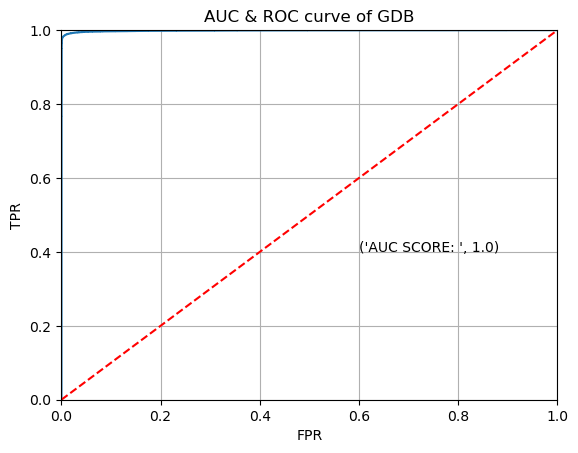

In [159]:
roc_curve_a(bosting_2,x_test,y_test)

In [160]:
import xgboost

In [161]:
from xgboost import XGBClassifier

In [162]:
xg_a=XGBClassifier()
bosting_a1=xg_a.fit(x_train,y_train)

In [163]:
model_evaluation(bosting_a1,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    140121
           1       1.00      1.00      1.00     32405

    accuracy                           1.00    172526
   macro avg       1.00      1.00      1.00    172526
weighted avg       1.00      1.00      1.00    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59879
           1       1.00      0.98      0.99     14062

    accuracy                           1.00     73941
   macro avg       1.00      0.99      0.99     73941
weighted avg       1.00      1.00      1.00     73941

***************************************************************


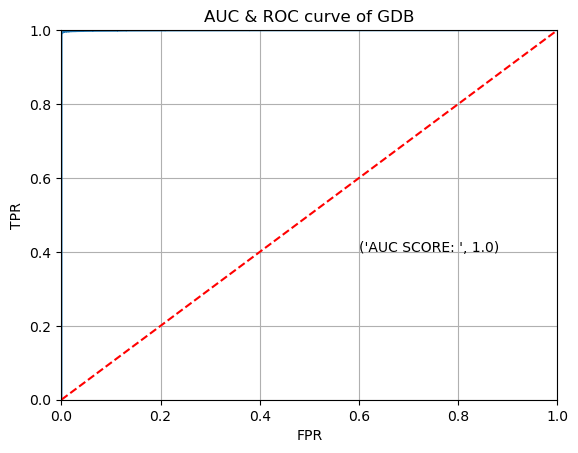

In [164]:
roc_curve_a(bosting_a1,x_test,y_test)

In [165]:
rf_a=RandomForestClassifier(n_estimators=80,max_depth=20)
bag_6=rf_a.fit(x_train,y_train)

In [166]:
model_evaluation(bag_6,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    140121
           1       1.00      0.99      1.00     32405

    accuracy                           1.00    172526
   macro avg       1.00      1.00      1.00    172526
weighted avg       1.00      1.00      1.00    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00     59879
           1       1.00      0.97      0.98     14062

    accuracy                           0.99     73941
   macro avg       1.00      0.98      0.99     73941
weighted avg       0.99      0.99      0.99     73941

***************************************************************


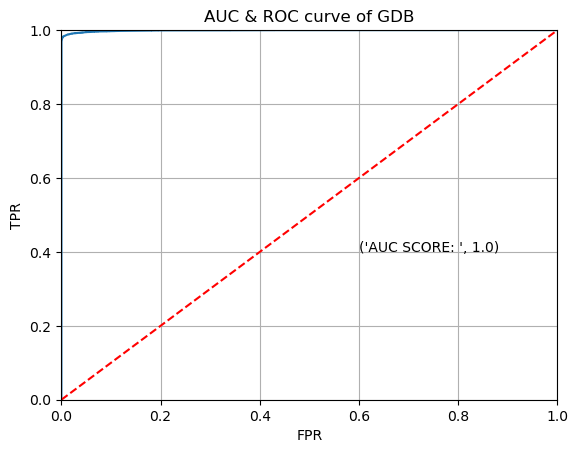

In [167]:
roc_curve_a(bag_6,x_test,y_test)

In [168]:
from sklearn.model_selection import GridSearchCV
tuning_parameters={'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                    'max_depth':[5,6,2,4],
                     'n_estimators':[2,5,8,9]}
#instantiate the XGBClassifier
gclassifier=GradientBoostingClassifier()
gb_grid=GridSearchCV(estimator=gclassifier,param_grid=tuning_parameters,cv=3,scoring='roc_auc')
#fit the model on Xtrian and ytrain using fit()
gb_grid.fit(x_train,y_train)
print('Best parameters for XGBoost classifier:',gb_grid.best_params_)

Best parameters for XGBoost classifier: {'learning_rate': 0.6, 'max_depth': 6, 'n_estimators': 9}


In [169]:
gb_model=GradientBoostingClassifier(**gb_grid.best_params_,random_state=10)
gb_model=gb_grid.fit(x_train,y_train)

In [170]:
model_evaluation(gb_model,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00    140121
           1       1.00      0.97      0.99     32405

    accuracy                           0.99    172526
   macro avg       1.00      0.99      0.99    172526
weighted avg       0.99      0.99      0.99    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00     59879
           1       1.00      0.97      0.98     14062

    accuracy                           0.99     73941
   macro avg       0.99      0.98      0.99     73941
weighted avg       0.99      0.99      0.99     73941

***************************************************************


In [171]:
gbc=GradientBoostingClassifier(n_estimators=220,max_depth=80,learning_rate=0.001)
final_model=gbc.fit(x_train,y_train)

In [175]:
model_evaluation(final_model,x_train,x_test,y_train,y_test)

Training report:               precision    recall  f1-score   support

           0       0.81      1.00      0.90    140121
           1       0.00      0.00      0.00     32405

    accuracy                           0.81    172526
   macro avg       0.41      0.50      0.45    172526
weighted avg       0.66      0.81      0.73    172526

*************************************************************
Testing report:               precision    recall  f1-score   support

           0       0.81      1.00      0.89     59879
           1       0.00      0.00      0.00     14062

    accuracy                           0.81     73941
   macro avg       0.40      0.50      0.45     73941
weighted avg       0.66      0.81      0.72     73941

***************************************************************


In [172]:
# import pickle
# # Assuming 'model' is your trained machine learning model
# with open('gb_model.pickle', 'wb') as file:
#     pickle.dump(gb_model, file)


In [173]:
import pickle

In [174]:
# with open(gb_model.pickle, "rb") as file:
#       data = pickle.load(file)
# def check_feature(data):
#     for i in data.columns:
#         print(i)